In [1]:
import numpy as np
import math 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as sm

# enable inline plotting
%matplotlib inline

# Research question: What perceptual descriptors are associated with high/low pleasantness scores? 

In [2]:
#Load the dataset as a pandas Dataframe 
df = pd.read_csv("TrainSet.txt", sep= "\t")  
df.head()

Compound Identifier                    Odor Replicate Intensity  Dilution  \
0                  126  4-Hydroxybenzaldehyde        NaN      low   1/1,000    
1                  126  4-Hydroxybenzaldehyde        NaN     high       1/10   
2                  126  4-Hydroxybenzaldehyde        NaN      low   1/1,000    
3                  126  4-Hydroxybenzaldehyde        NaN     high       1/10   
4                  126  4-Hydroxybenzaldehyde        NaN      low   1/1,000    

   subject #  INTENSITY/STRENGTH  VALENCE/PLEASANTNESS  BAKERY  SWEET  ...  \
0          1                   7                  62.0     0.0    0.0  ...   
1          1                  37                  60.0     0.0   72.0  ...   
2          2                  55                  89.0     0.0   33.0  ...   
3          2                  64                  71.0     0.0    9.0  ...   
4          3                  89                  68.0     0.0   62.0  ...   

   ACID  WARM  MUSKY  SWEATY  AMMONIA/URINOUS  DECAYED  WOOD  GRASS  FLOWER  \
0   0.0   0.0    0.0    21.0              0.0      0.0   0.0    0.0     0.0   
1   0.0   0.0    0.0     0.0              0.0      0.0   0.0    0.0     0.0   
2   0.0   0.0    0.0     0.0              0.0      0.0   0.0    0.0     0.0   
3   0.0   0.0    0.0     0.0              0.0      0.0   0.0    0.0     0.0   
4   0.0  62.0    0.0     0.0              0.0      0.0   0.0    0.0     0.0   

   CHEMICAL  
0       0.0  
1       0.0  
2       5.0  
3       7.0  
4       0.0  

[5 rows x 27 columns]

### Get an Overview of the Dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35084 entries, 0 to 35083
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Compound Identifier   35084 non-null  int64  
 1   Odor                  35084 non-null  object 
 2   Replicate             1960 non-null   object 
 3   Intensity             35084 non-null  object 
 4   Dilution              35084 non-null  object 
 5   subject #             35084 non-null  int64  
 6   INTENSITY/STRENGTH    35084 non-null  int64  
 7   VALENCE/PLEASANTNESS  25980 non-null  float64
 8   BAKERY                25980 non-null  float64
 9   SWEET                 25980 non-null  float64
 10  FRUIT                 25980 non-null  float64
 11  FISH                  25980 non-null  float64
 12  GARLIC                25980 non-null  float64
 13  SPICES                25980 non-null  float64
 14  COLD                  25980 non-null  float64
 15  SOUR               

In [4]:
df.describe()

Compound Identifier     subject #  INTENSITY/STRENGTH  \
count         3.508400e+04  35084.000000        35084.000000   
mean          3.498355e+05     25.000000           39.890890   
std           1.214971e+06     14.142337           37.002882   
min           1.260000e+02      1.000000            0.000000   
25%           7.341000e+03     13.000000            0.000000   
50%           1.125700e+04     25.000000           36.000000   
75%           6.132500e+04     37.000000           75.000000   
max           6.999977e+06     49.000000          100.000000   

       VALENCE/PLEASANTNESS        BAKERY         SWEET         FRUIT  \
count          25980.000000  25980.000000  25980.000000  25980.000000   
mean              44.376135      3.416590     12.925212      4.953426   
std               27.754299     14.041675     25.041555     16.943679   
min                0.000000      0.000000      0.000000      0.000000   
25%               22.000000      0.000000      0.000000      0.000000   
50%               44.000000      0.000000      0.000000      0.000000   
75%               63.000000      0.000000     13.000000      0.000000   
max              100.000000    100.000000    100.000000    100.000000   

               FISH        GARLIC        SPICES  ...          ACID  \
count  25980.000000  25980.000000  25980.000000  ...  25980.000000   
mean       1.712240      3.387452      6.052002  ...      5.886798   
std        9.629778     13.755972     17.293312  ...     16.266140   
min        0.000000      0.000000      0.000000  ...      0.000000   
25%        0.000000      0.000000      0.000000  ...      0.000000   
50%        0.000000      0.000000      0.000000  ...      0.000000   
75%        0.000000      0.000000      0.000000  ...      0.000000   
max      100.000000    100.000000    100.000000  ...    100.000000   

               WARM         MUSKY        SWEATY  AMMONIA/URINOUS  \
count  25980.000000  25980.000000  25980.000000     25980.000000   
mean       5.772132      8.407275      4.137837         5.118129   
std       16.829423     20.589364     14.822344        16.899752   
min        0.000000      0.000000      0.000000         0.000000   
25%        0.000000      0.000000      0.000000         0.000000   
50%        0.000000      0.000000      0.000000         0.000000   
75%        0.000000      0.000000      0.000000         0.000000   
max      100.000000    100.000000    100.000000       100.000000   

            DECAYED          WOOD         GRASS        FLOWER      CHEMICAL  
count  25980.000000  25980.000000  25980.000000  25980.000000  25980.000000  
mean       4.778907      3.468129      3.428329      6.057236     15.615012  
std       16.507106     13.807406     14.127427     18.806966     27.592485  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000      0.000000     22.000000  
max      100.000000    100.000000    100.000000    100.000000    100.000000  

[8 rows x 23 columns]

Pleasantness was ranked with a score between 0-100, where 0 was extremly unpleasant and 100 extremly pleasant. The average value in the data set is a pleasantness of 44.3 with a standartdeviation of around 27.8

In [5]:
#Asses how many Unique Odors, Intensities and Dilutions are included in the dataframe 
df.describe(include=object)

Odor   Replicate Intensity  Dilution
count                    35084        1960     35084     35084
unique                     358           1         2         4
top     4-Hydroxybenzaldehyde   replicate       low   1/1,000 
freq                        98        1960     17542     14455

In [6]:
df["Odor"].value_counts()
print("Each Odor was tested by 98 Individuals")

Each Odor was tested by 98 Individuals


In [7]:
#Discover the columns with numerical values
df_numerical=df.loc[:,(df.dtypes=='float64').values]
df_numerical.head()

VALENCE/PLEASANTNESS  BAKERY  SWEET  FRUIT  FISH  GARLIC  SPICES  COLD  \
0                  62.0     0.0    0.0    0.0   0.0     0.0     0.0   0.0   
1                  60.0     0.0   72.0    0.0   0.0     0.0     0.0   0.0   
2                  89.0     0.0   33.0    1.0   0.0     0.0     3.0   0.0   
3                  71.0     0.0    9.0    2.0   0.0     0.0    11.0   0.0   
4                  68.0     0.0   62.0    0.0   0.0     0.0    35.0   0.0   

   SOUR  BURNT  ACID  WARM  MUSKY  SWEATY  AMMONIA/URINOUS  DECAYED  WOOD  \
0   0.0    0.0   0.0   0.0    0.0    21.0              0.0      0.0   0.0   
1   0.0    0.0   0.0   0.0    0.0     0.0              0.0      0.0   0.0   
2   0.0    0.0   0.0   0.0    0.0     0.0              0.0      0.0   0.0   
3   0.0    0.0   0.0   0.0    0.0     0.0              0.0      0.0   0.0   
4   0.0    0.0   0.0  62.0    0.0     0.0              0.0      0.0   0.0   

   GRASS  FLOWER  CHEMICAL  
0    0.0     0.0       0.0  
1    0.0     0.0       0.0  
2    0.0     0.0       5.0  
3    0.0     0.0       7.0  
4    0.0     0.0       0.0

VALENCE/PLEASANTNESS


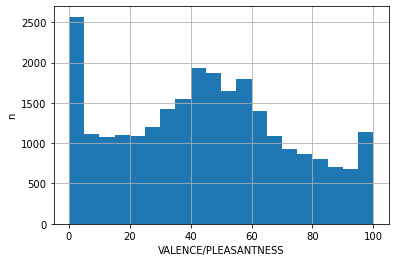

BAKERY


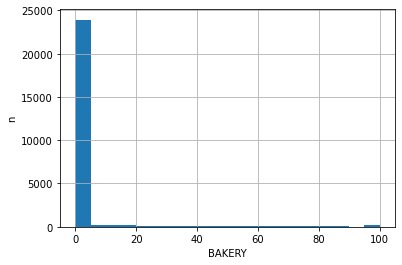

SWEET


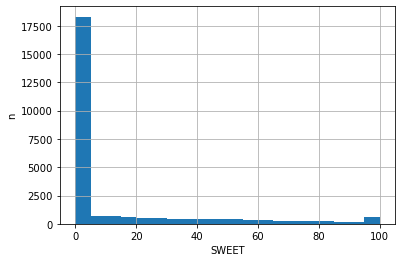

FRUIT


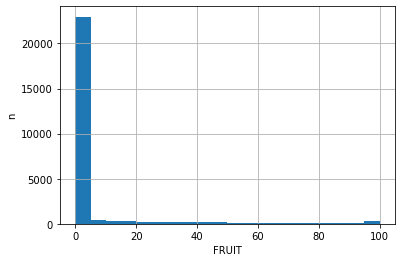

FISH


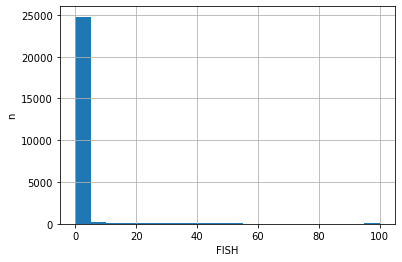

GARLIC


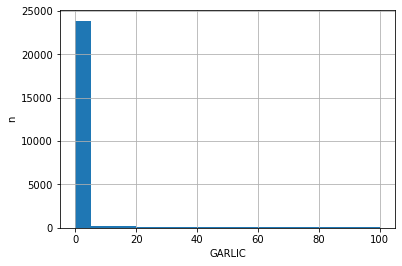

SPICES


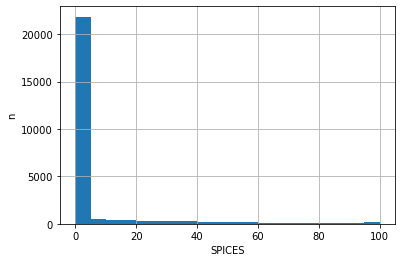

COLD


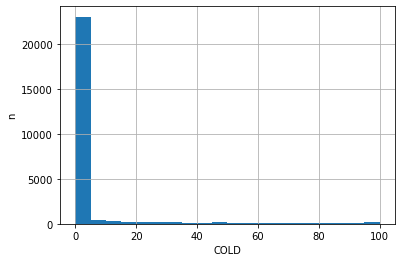

SOUR


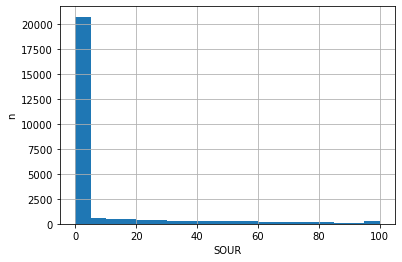

BURNT


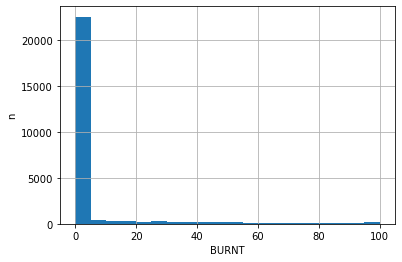

ACID


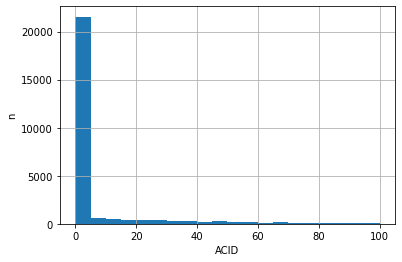

WARM


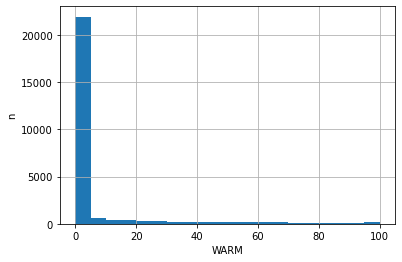

MUSKY


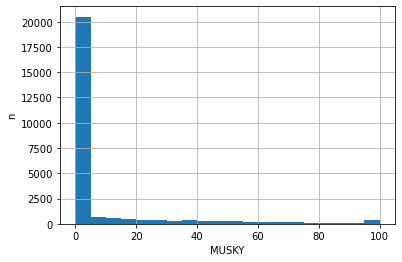

SWEATY


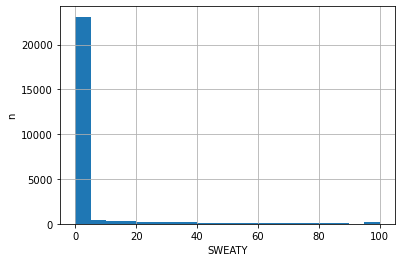

AMMONIA/URINOUS


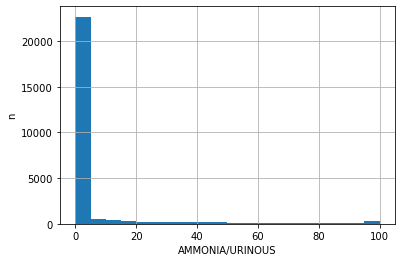

DECAYED


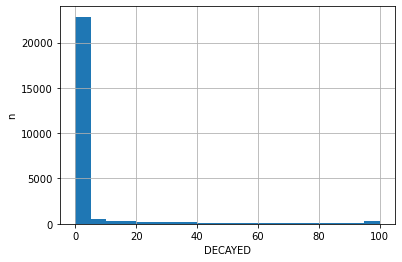

WOOD


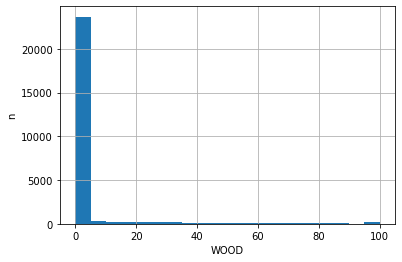

GRASS


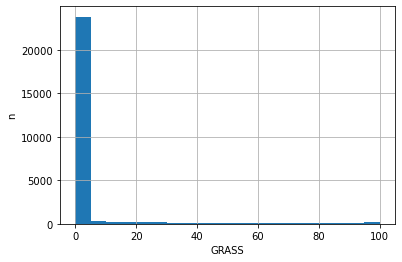

FLOWER


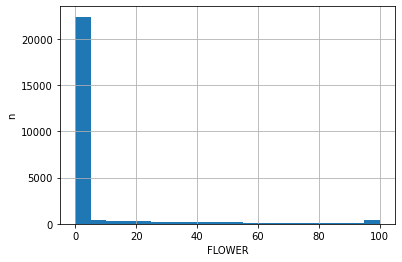

CHEMICAL


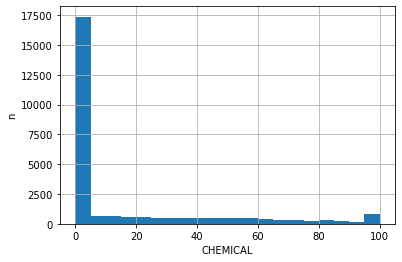

In [8]:
numerical_cleaned=df_numerical.dropna()
column=list(numerical_cleaned)

for i in range (20):
    print(column[i])
    data=numerical_cleaned[column[i]]
    data.hist(bins=20)
    plt.xlabel(column[i])
    plt.ylabel("n")
    plt.show()

VALENCE/PLEASANTNESS


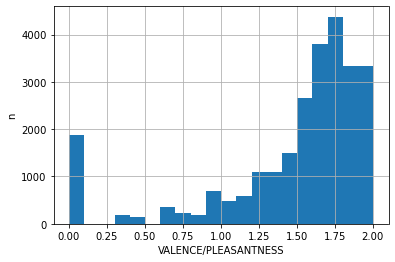

BAKERY


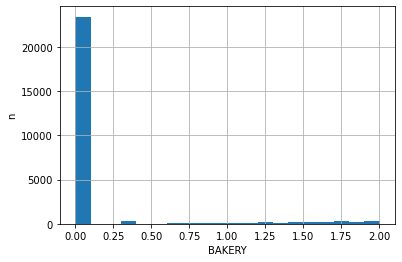

SWEET


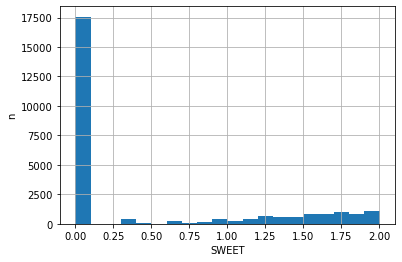

FRUIT


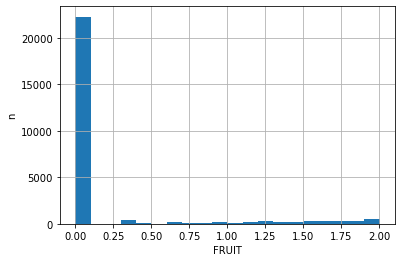

FISH


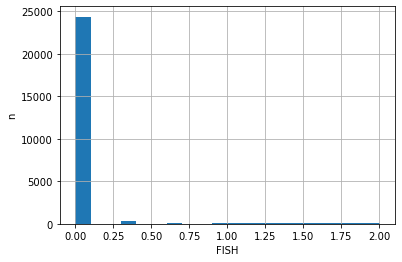

GARLIC


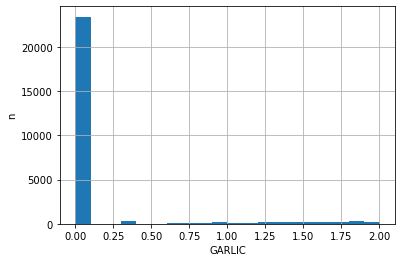

SPICES


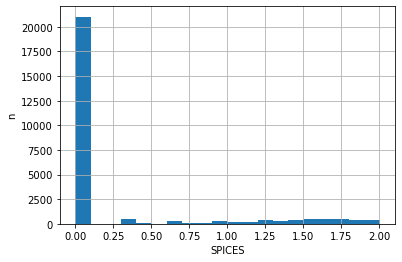

COLD


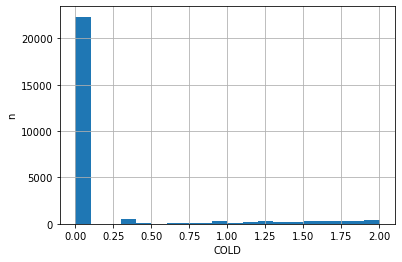

SOUR


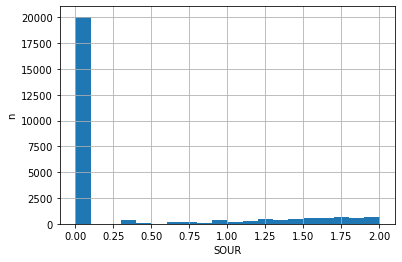

BURNT


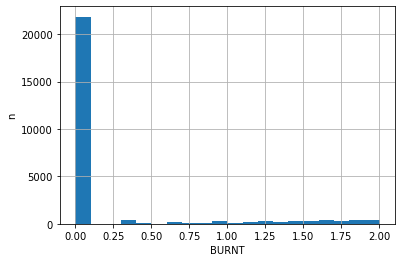

ACID


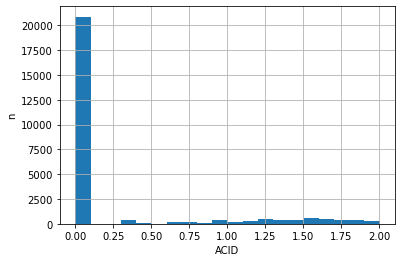

WARM


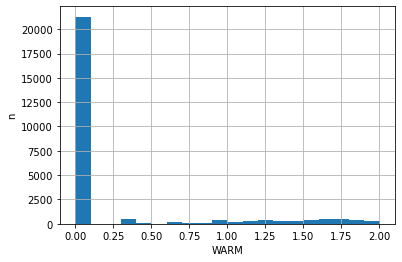

MUSKY


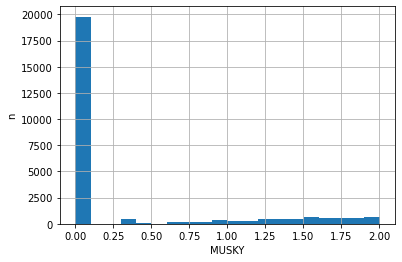

SWEATY


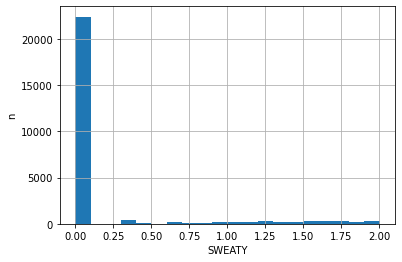

AMMONIA/URINOUS


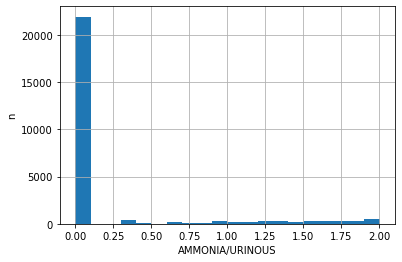

DECAYED


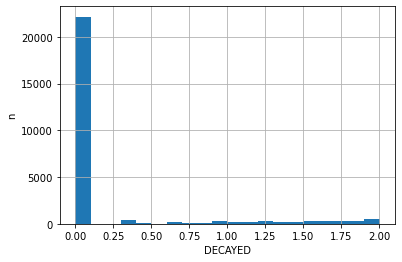

WOOD


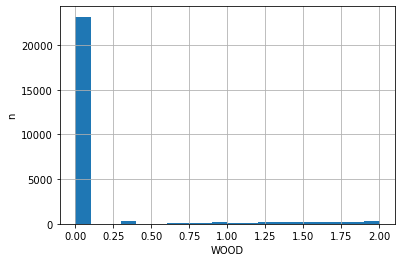

GRASS


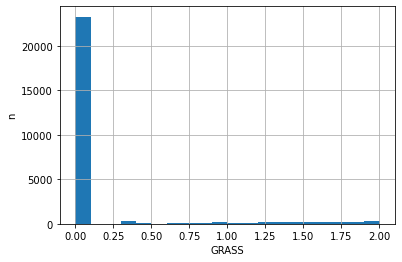

FLOWER


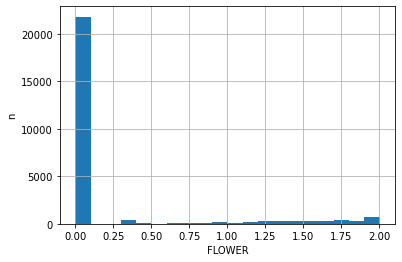

CHEMICAL


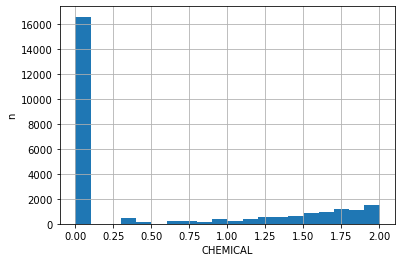

In [9]:

for i in range (20):
    print(column[i])
    data=np.log10(numerical_cleaned[column[i]]+1)
    data.hist(bins=20)
    plt.xlabel(column[i])
    plt.ylabel("n")
    plt.show()

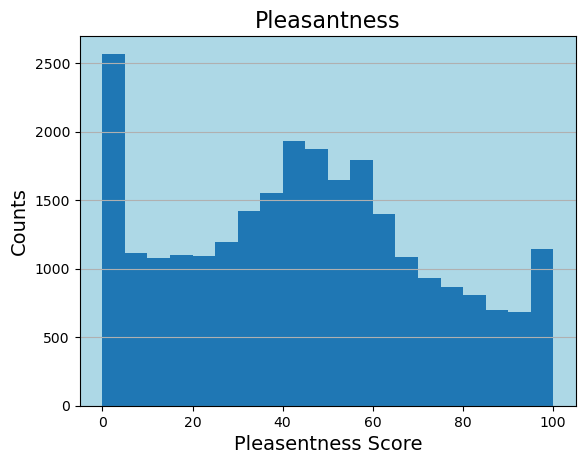

In [10]:
# A nice Histogram to show the distribution of the pleasantness scores:

plt.rcdefaults()
plt.rcParams.update({'axes.facecolor':'lightblue'})
dataP=numerical_cleaned[column[0]]
fig, ax = plt.subplots()
dataP.plot.hist(ax=ax, bins=20)
#dataP.plot.kde(legend=False, title='Pleasantness', bw_method=0.1)
ax.set_title("Pleasantness", fontsize=16)
ax.set_ylabel("Counts", fontsize=14)
ax.set_xlabel("Pleasentness Score", fontsize=14)
ax.grid(axis='y')
#ax.set_facecolor('#2ab0ff')
plt.savefig('Pleasantness Score')

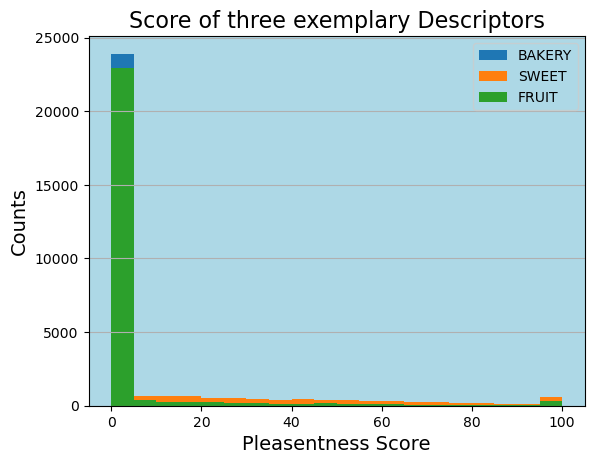

In [11]:
# A nice Plot to show the distribution of scores for descriptors (three examples):

plt.rcdefaults()
plt.rcParams.update({'axes.facecolor':'lightblue'})
dataA=numerical_cleaned[column[1:4]]
fig, ax = plt.subplots()
dataA.plot.hist(ax=ax, bins=20)
#dataP.plot.kde(legend=False, title='Pleasantness', bw_method=0.1)
ax.set_title("Score of three exemplary Descriptors", fontsize=16)
ax.set_ylabel("Counts", fontsize=14)
ax.set_xlabel("Pleasentness Score", fontsize=14)
ax.grid(axis='y')
#ax.set_facecolor('#2ab0ff')
plt.savefig('Score Descriptors with Zero')

For most compounds values are around 0 and then only several are higher.

In [12]:
#Check if there are NAN value
print(df.isnull().values.any())
nan_values=df[df.isna().any(axis=1)]
print("The number of rows which have at least one NAN value is:", len(df[df.isna().any(axis=1)]))

True
The number of rows which have at least one NAN value is: 33611


**First plots to discover the distributation of Pleasantness scores according to descriptor scores**

25980
25980


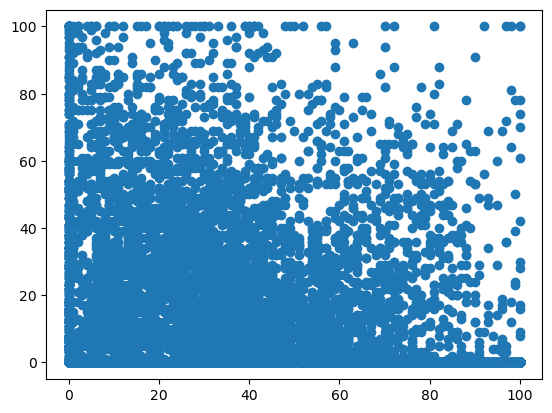

In [14]:
print(len(numerical_cleaned["BURNT"]))
print(len(numerical_cleaned["VALENCE/PLEASANTNESS"]))
plt.rcdefaults()
plt.rcParams.update({'axes.facecolor':'white'})
plt.scatter(numerical_cleaned["VALENCE/PLEASANTNESS"],numerical_cleaned["ACID"])


BAKERY


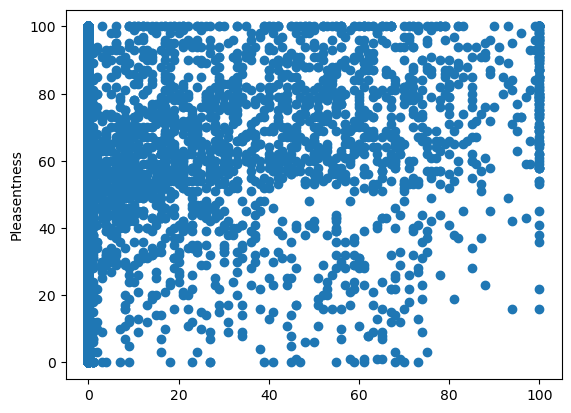

SWEET


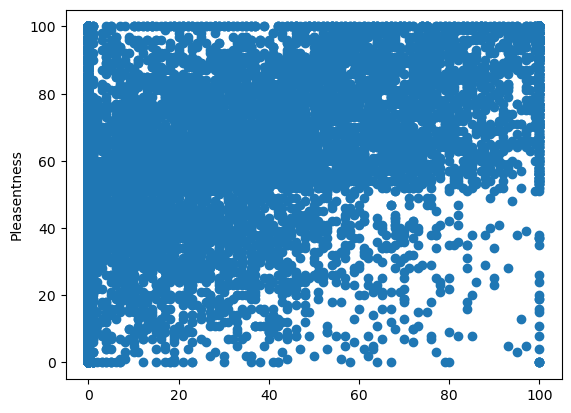

FRUIT


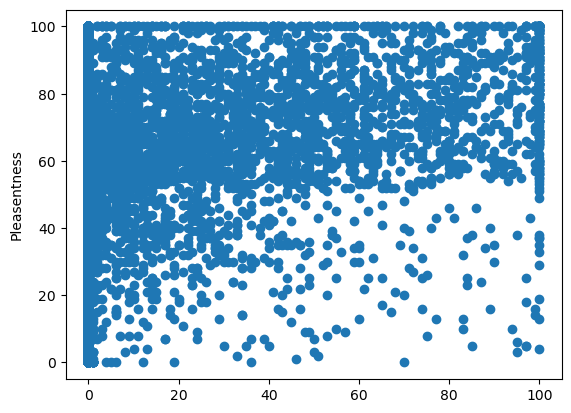

FISH


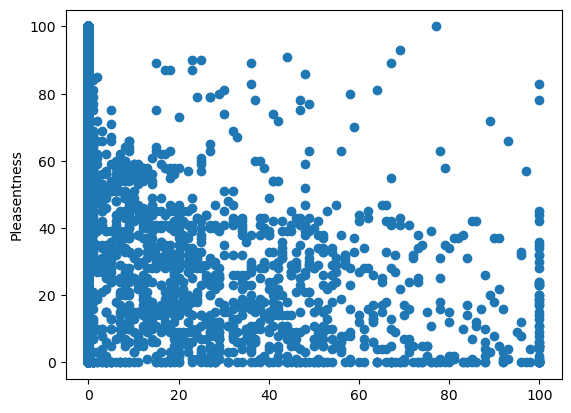

GARLIC


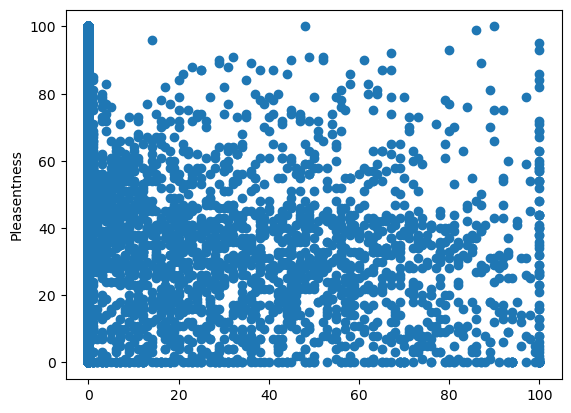

SPICES


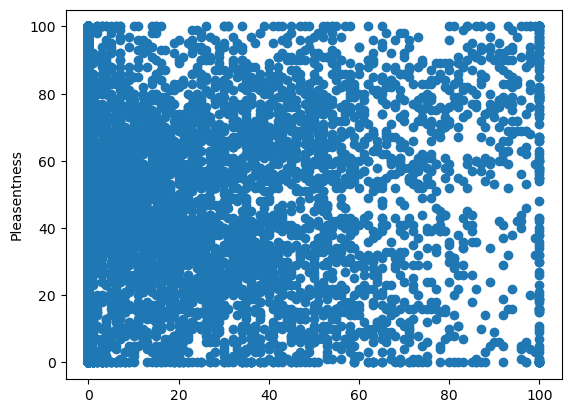

COLD


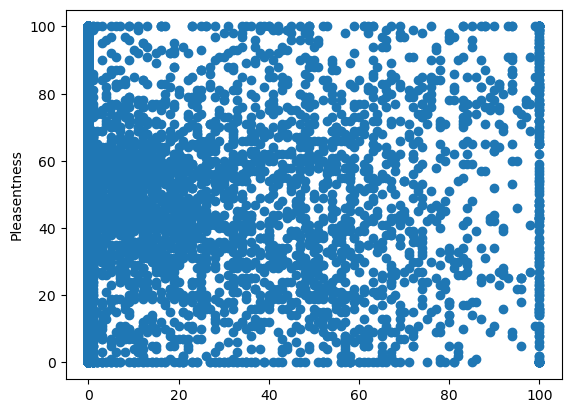

SOUR


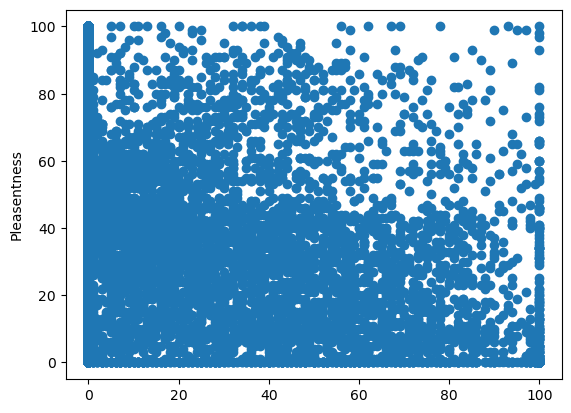

BURNT


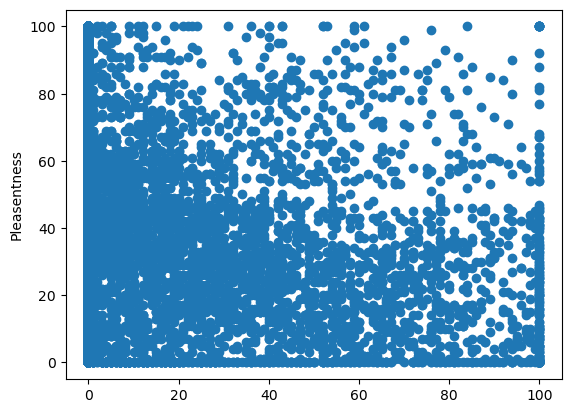

ACID


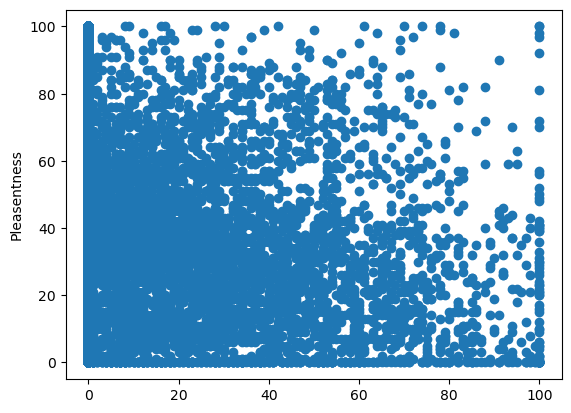

WARM


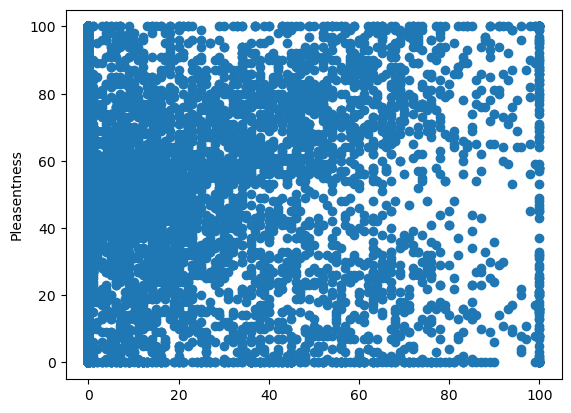

MUSKY


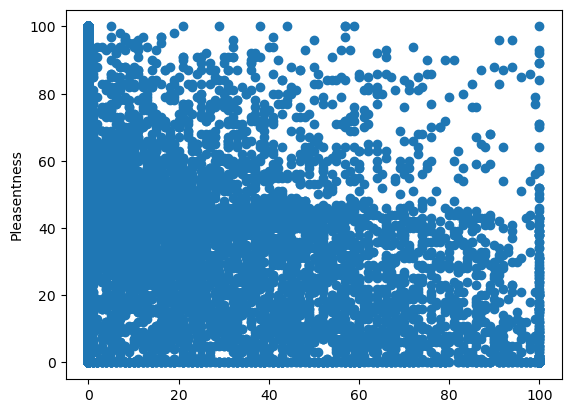

SWEATY


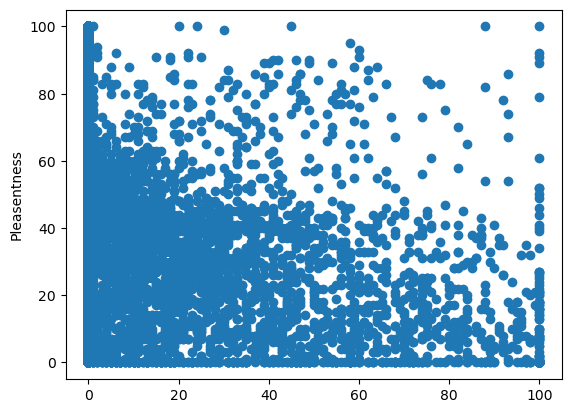

AMMONIA/URINOUS


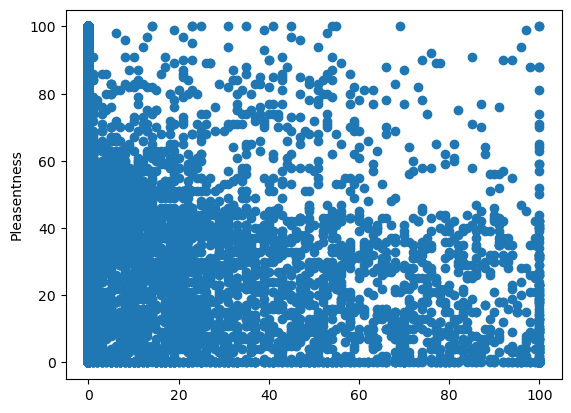

DECAYED


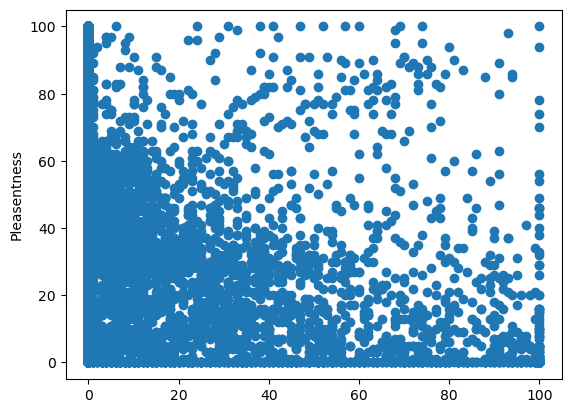

WOOD


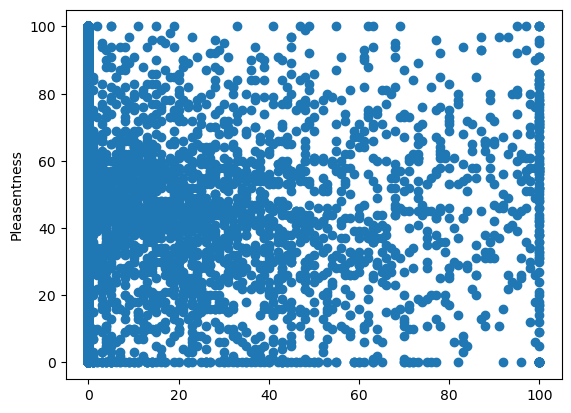

GRASS


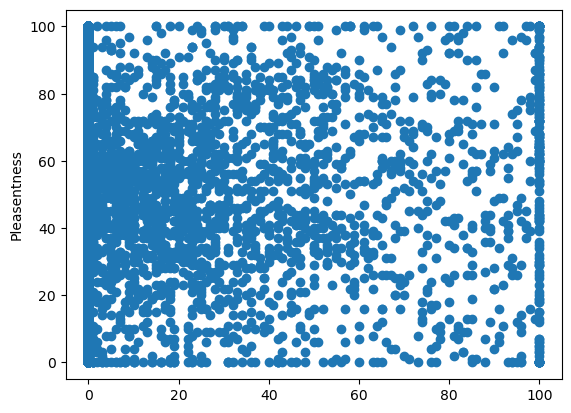

FLOWER


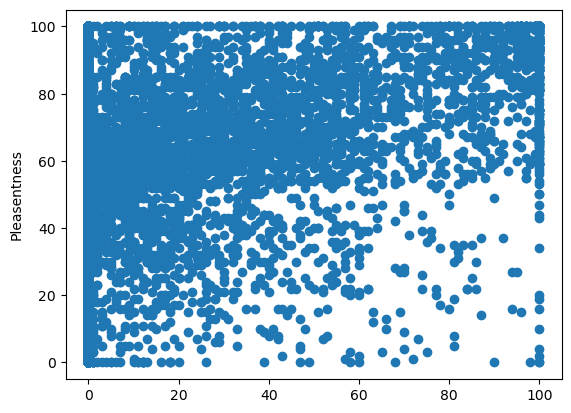

CHEMICAL


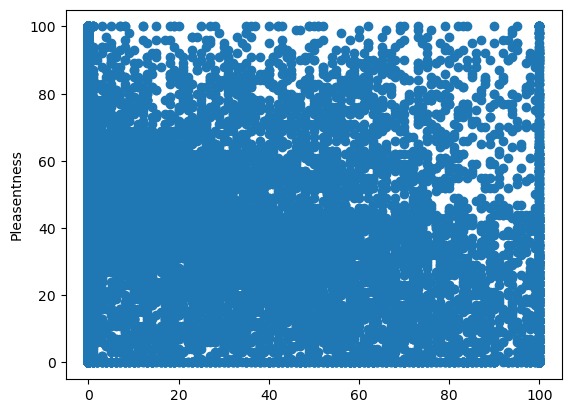

In [15]:
#Check pleasantness against the specific compounds (in the general dataset)

column=list(numerical_cleaned)


for i in range (1,20):
    print(column[i])
    data=numerical_cleaned[column[i]]
    plt.scatter(data, numerical_cleaned["VALENCE/PLEASANTNESS"])
    plt.ylabel("Pleasentness")

    plt.show()

In [169]:
print(len(df))

35084


In [16]:
#Are there NA values in the Valence/Pleasantness column?

print(df["VALENCE/PLEASANTNESS"].isna().values.any())
df.isnull().sum(axis = 0)

True


Compound Identifier         0
Odor                        0
Replicate               33124
Intensity                   0
Dilution                    0
subject #                   0
INTENSITY/STRENGTH          0
VALENCE/PLEASANTNESS     9104
BAKERY                   9104
SWEET                    9104
FRUIT                    9104
FISH                     9104
GARLIC                   9104
SPICES                   9104
COLD                     9104
SOUR                     9104
BURNT                    9104
ACID                     9104
WARM                     9104
MUSKY                    9104
SWEATY                   9104
AMMONIA/URINOUS          9104
DECAYED                  9104
WOOD                     9104
GRASS                    9104
FLOWER                   9104
CHEMICAL                 9104
dtype: int64

Why are there 9104 Compunds where the Pleasantness was not assessed? This are most likely the compunds which could not be observed by the Subject. For the further Pleasantness analysis these columns can be removed since we are only interested in columns of Compunds/Descriptors, wher we know how pleasant it was rated.

## Cleanup

In [17]:
#Clean up the dataset

df_pleasant_clean=df.dropna(subset=["VALENCE/PLEASANTNESS"])
print(df["VALENCE/PLEASANTNESS"].isna().values.any())
print(df_pleasant_clean["VALENCE/PLEASANTNESS"].isna().values.any())
print(df_pleasant_clean.isna().values.any())

#check if really only the 9104 rows with an NA value in Valence were deleted by checking the length (length should be 25980)
len(df_pleasant_clean)

True
False
True


25980

In [18]:
df_pleasant_clean.head()

Compound Identifier                    Odor Replicate Intensity  Dilution  \
0                  126  4-Hydroxybenzaldehyde        NaN      low   1/1,000    
1                  126  4-Hydroxybenzaldehyde        NaN     high       1/10   
2                  126  4-Hydroxybenzaldehyde        NaN      low   1/1,000    
3                  126  4-Hydroxybenzaldehyde        NaN     high       1/10   
4                  126  4-Hydroxybenzaldehyde        NaN      low   1/1,000    

   subject #  INTENSITY/STRENGTH  VALENCE/PLEASANTNESS  BAKERY  SWEET  ...  \
0          1                   7                  62.0     0.0    0.0  ...   
1          1                  37                  60.0     0.0   72.0  ...   
2          2                  55                  89.0     0.0   33.0  ...   
3          2                  64                  71.0     0.0    9.0  ...   
4          3                  89                  68.0     0.0   62.0  ...   

   ACID  WARM  MUSKY  SWEATY  AMMONIA/URINOUS  DECAYED  WOOD  GRASS  FLOWER  \
0   0.0   0.0    0.0    21.0              0.0      0.0   0.0    0.0     0.0   
1   0.0   0.0    0.0     0.0              0.0      0.0   0.0    0.0     0.0   
2   0.0   0.0    0.0     0.0              0.0      0.0   0.0    0.0     0.0   
3   0.0   0.0    0.0     0.0              0.0      0.0   0.0    0.0     0.0   
4   0.0  62.0    0.0     0.0              0.0      0.0   0.0    0.0     0.0   

   CHEMICAL  
0       0.0  
1       0.0  
2       5.0  
3       7.0  
4       0.0  

[5 rows x 27 columns]

In [19]:
#Sort it according to dilution (high/low Concentration)

Dilution_1=df_pleasant_clean.loc[df_pleasant_clean['Dilution'] =='1/10']
Dilution_2=df_pleasant_clean.loc[df_pleasant_clean['Dilution'] =='1/1,000 ']
Dilution_3=df_pleasant_clean.loc[df_pleasant_clean['Dilution'] =='1/100,000 ']
Dilution_4=df_pleasant_clean.loc[df_pleasant_clean['Dilution'] =='1/10,000,000 ']

In [20]:
#Make a low dilution and a high dilution dataframe 

df_list_high = [Dilution_1, Dilution_3]
df_high = pd.concat(df_list_high, sort=True)
df_high.head()
df_high.describe()

ACID  AMMONIA/URINOUS        BAKERY         BURNT  \
count  12585.000000     12585.000000  12585.000000  12585.000000   
mean       5.489789         4.931903      3.422169      5.822487   
std       15.621173        16.715740     14.004109     17.914418   
min        0.000000         0.000000      0.000000      0.000000   
25%        0.000000         0.000000      0.000000      0.000000   
50%        0.000000         0.000000      0.000000      0.000000   
75%        0.000000         0.000000      0.000000      0.000000   
max      100.000000       100.000000    100.000000    100.000000   

           CHEMICAL          COLD  Compound Identifier       DECAYED  \
count  12585.000000  12585.000000         1.258500e+04  12585.000000   
mean      14.129758      4.361700         3.327691e+05      4.793882   
std       26.282361     15.554534         1.174116e+06     16.517106   
min        0.000000      0.000000         1.260000e+02      0.000000   
25%        0.000000      0.000000         7.194000e+03      0.000000   
50%        0.000000      0.000000         1.158300e+04      0.000000   
75%       17.000000      0.000000         6.138600e+04      0.000000   
max      100.000000    100.000000         6.999977e+06    100.000000   

               FISH        FLOWER  ...  INTENSITY/STRENGTH         MUSKY  \
count  12585.000000  12585.000000  ...        12585.000000  12585.000000   
mean       1.758840      5.961065  ...           50.782042      8.842749   
std        9.691831     18.830869  ...           33.608429     20.970080   
min        0.000000      0.000000  ...            0.000000      0.000000   
25%        0.000000      0.000000  ...           17.000000      0.000000   
50%        0.000000      0.000000  ...           58.000000      0.000000   
75%        0.000000      0.000000  ...           80.000000      0.000000   
max      100.000000    100.000000  ...          100.000000    100.000000   

               SOUR        SPICES        SWEATY         SWEET  \
count  12585.000000  12585.000000  12585.000000  12585.000000   
mean       8.466031      5.919110      4.198967     11.741597   
std       20.870578     16.915429     14.892932     23.705540   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000     10.000000   
max      100.000000    100.000000    100.000000    100.000000   

       VALENCE/PLEASANTNESS          WARM          WOOD     subject #  
count          12585.000000  12585.000000  12585.000000  12585.000000  
mean              44.150099      5.886849      3.714501     25.424394  
std               27.384035     16.973753     14.181575     14.251589  
min                0.000000      0.000000      0.000000      1.000000  
25%               23.000000      0.000000      0.000000     13.000000  
50%               44.000000      0.000000      0.000000     25.000000  
75%               62.000000      0.000000      0.000000     38.000000  
max              100.000000    100.000000    100.000000     49.000000  

[8 rows x 23 columns]

In [21]:
df_list_low = [Dilution_2, Dilution_4]
df_low = pd.concat(df_list_low, sort=True)
df_low.head()
df_low.describe()

ACID  AMMONIA/URINOUS        BAKERY         BURNT  \
count  13395.000000     13395.000000  13395.000000  13395.000000   
mean       6.259798         5.293094      3.411348      5.035088   
std       16.841685        17.069602     14.077399     16.395650   
min        0.000000         0.000000      0.000000      0.000000   
25%        0.000000         0.000000      0.000000      0.000000   
50%        0.000000         0.000000      0.000000      0.000000   
75%        0.000000         0.000000      0.000000      0.000000   
max      100.000000       100.000000    100.000000    100.000000   

           CHEMICAL          COLD  Compound Identifier       DECAYED  \
count  13395.000000  13395.000000         1.339500e+04  13395.000000   
mean      17.010452      4.707577         3.542633e+05      4.764838   
std       28.700108     16.141730         1.214764e+06     16.498309   
min        0.000000      0.000000         1.260000e+02      0.000000   
25%        0.000000      0.000000         7.635000e+03      0.000000   
50%        0.000000      0.000000         1.158300e+04      0.000000   
75%       26.000000      0.000000         6.133100e+04      0.000000   
max      100.000000    100.000000         6.999977e+06    100.000000   

               FISH        FLOWER  ...  INTENSITY/STRENGTH         MUSKY  \
count  13395.000000  13395.000000  ...        13395.000000  13395.000000   
mean       1.668458      6.147592  ...           56.770437      7.998134   
std        9.571266     18.784736  ...           32.360034     20.217381   
min        0.000000      0.000000  ...            0.000000      0.000000   
25%        0.000000      0.000000  ...           29.000000      0.000000   
50%        0.000000      0.000000  ...           64.000000      0.000000   
75%        0.000000      0.000000  ...           83.000000      0.000000   
max      100.000000    100.000000  ...          100.000000    100.000000   

               SOUR        SPICES        SWEATY         SWEET  \
count  13395.000000  13395.000000  13395.000000  13395.000000   
mean       8.501082      6.176857      4.080403     14.037253   
std       20.719734     17.640691     14.756043     26.187050   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000     17.000000   
max      100.000000    100.000000    100.000000    100.000000   

       VALENCE/PLEASANTNESS          WARM          WOOD     subject #  
count          13395.000000  13395.000000  13395.000000  13395.000000  
mean              44.588503      5.664352      3.236655     25.407167  
std               28.097092     16.692600     13.442798     14.206910  
min                0.000000      0.000000      0.000000      1.000000  
25%               22.000000      0.000000      0.000000     13.000000  
50%               44.000000      0.000000      0.000000     26.000000  
75%               64.000000      0.000000      0.000000     37.000000  
max              100.000000    100.000000    100.000000     49.000000  

[8 rows x 23 columns]

In [22]:
#Redo compound analysis for the high dilutions:

#Only include the numerical values for plotting
df_numerical_high=df_high.loc[:,(df_high.dtypes=='float64').values]
df_numerical_high.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12585 entries, 1 to 35082
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ACID                  12585 non-null  float64
 1   AMMONIA/URINOUS       12585 non-null  float64
 2   BAKERY                12585 non-null  float64
 3   BURNT                 12585 non-null  float64
 4   CHEMICAL              12585 non-null  float64
 5   COLD                  12585 non-null  float64
 6   DECAYED               12585 non-null  float64
 7   FISH                  12585 non-null  float64
 8   FLOWER                12585 non-null  float64
 9   FRUIT                 12585 non-null  float64
 10  GARLIC                12585 non-null  float64
 11  GRASS                 12585 non-null  float64
 12  MUSKY                 12585 non-null  float64
 13  SOUR                  12585 non-null  float64
 14  SPICES                12585 non-null  float64
 15  SWEATY             

AMMONIA/URINOUS


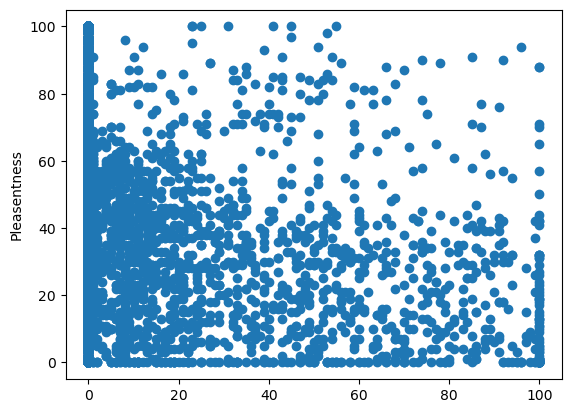

BAKERY


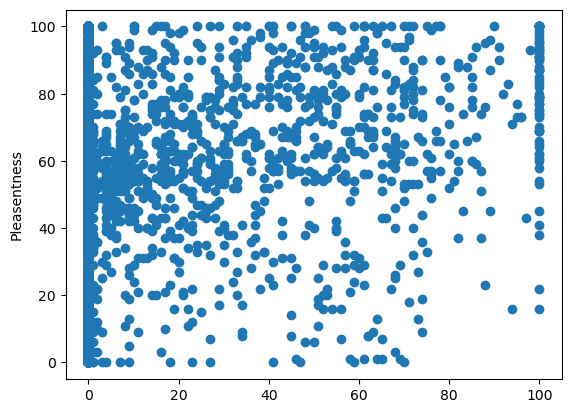

BURNT


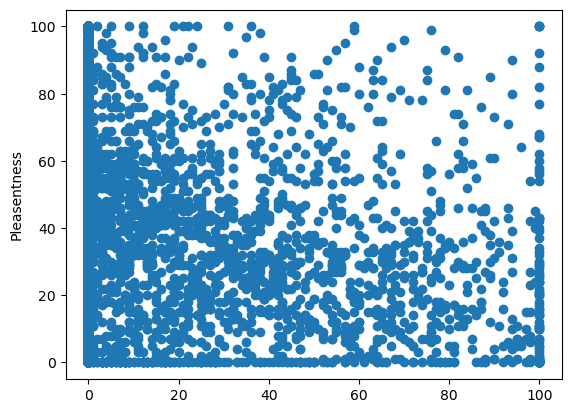

CHEMICAL


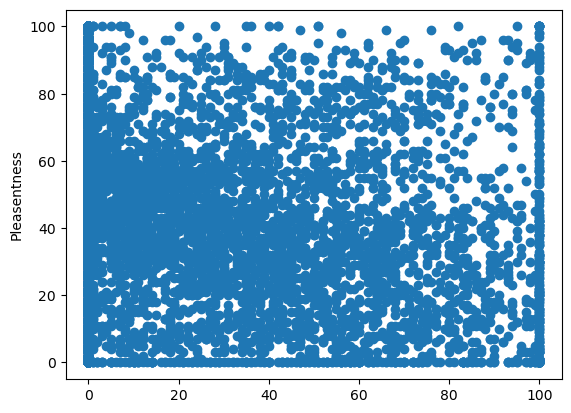

COLD


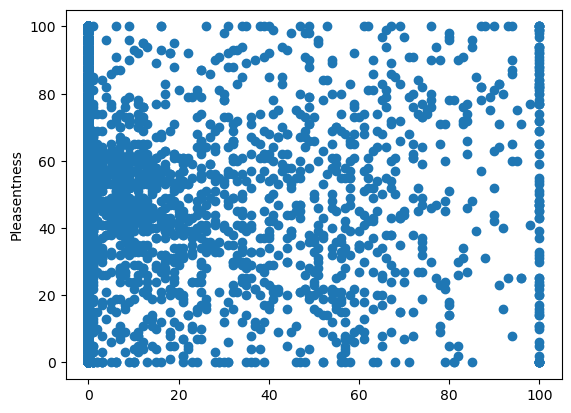

DECAYED


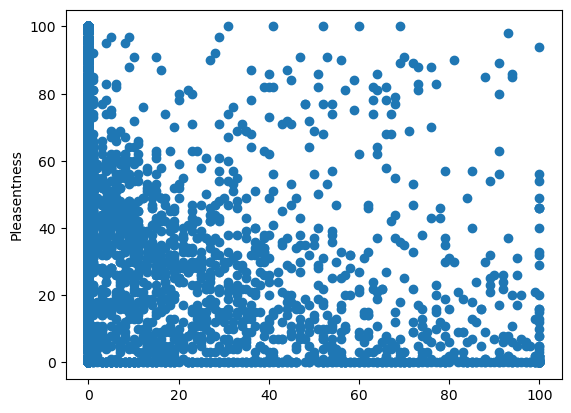

FISH


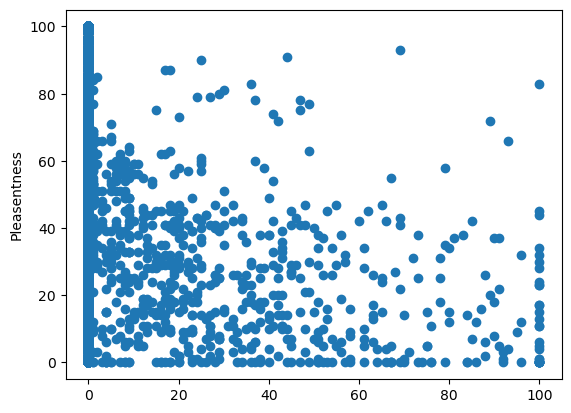

FLOWER


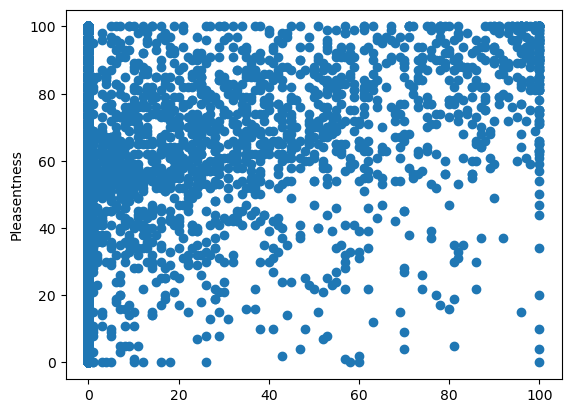

FRUIT


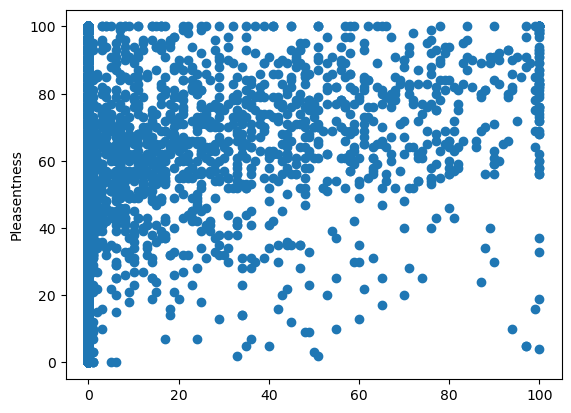

GARLIC


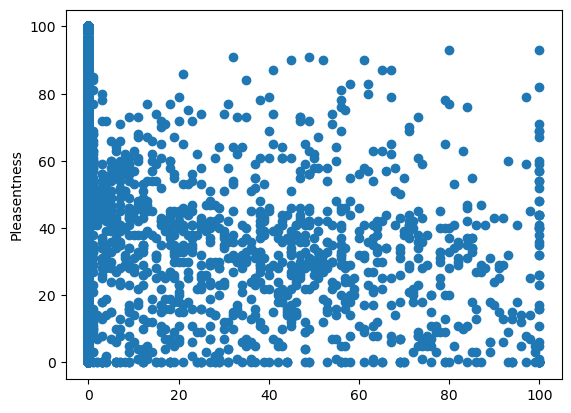

GRASS


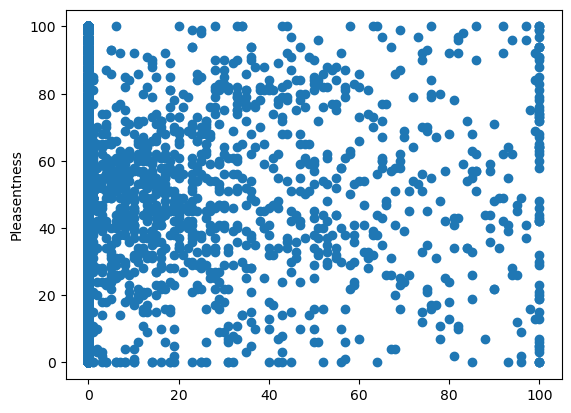

MUSKY


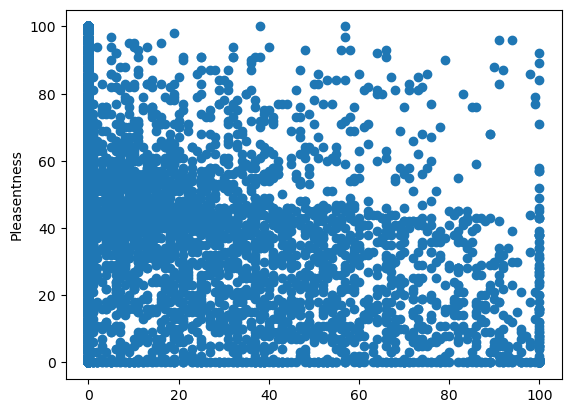

SOUR


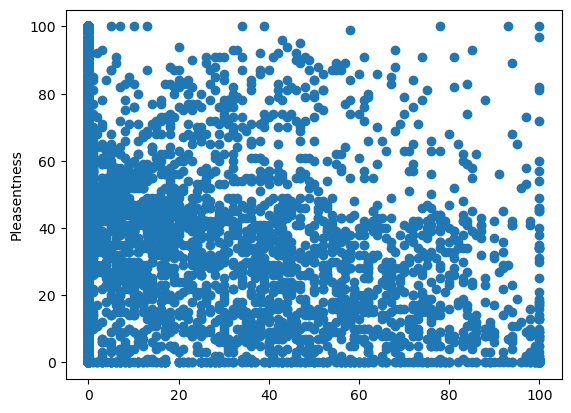

SPICES


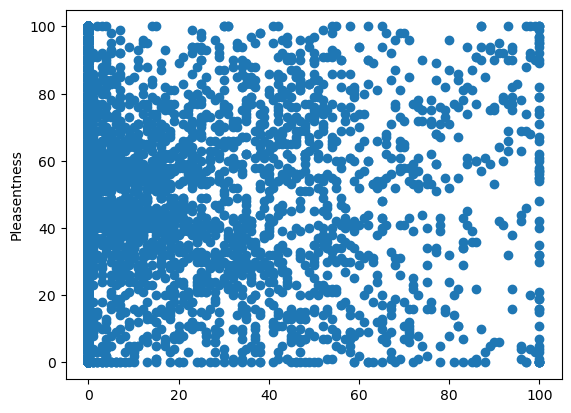

SWEATY


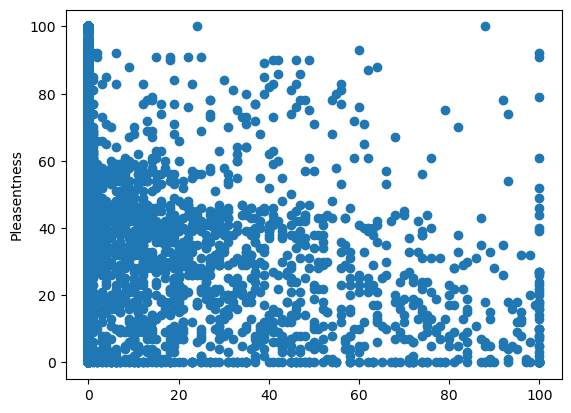

SWEET


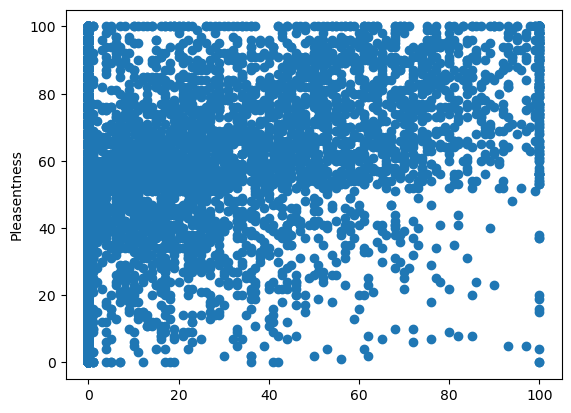

VALENCE/PLEASANTNESS


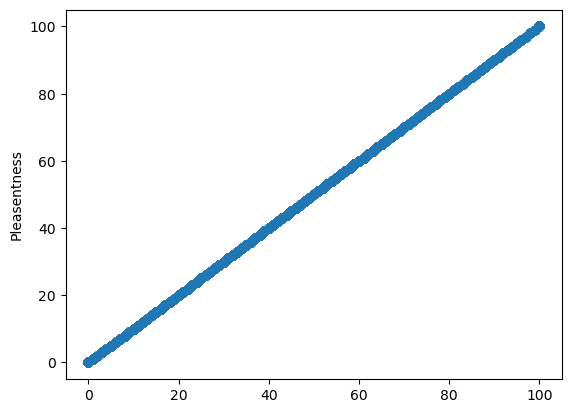

WARM


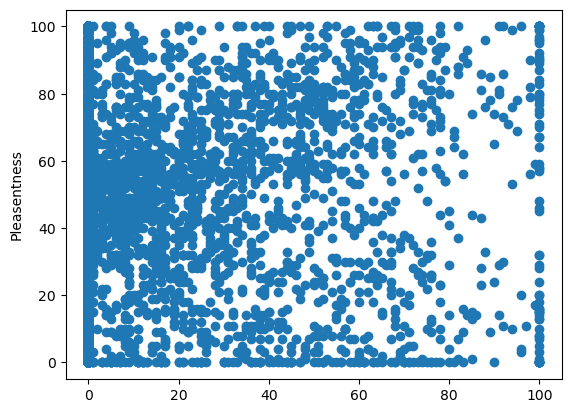

WOOD


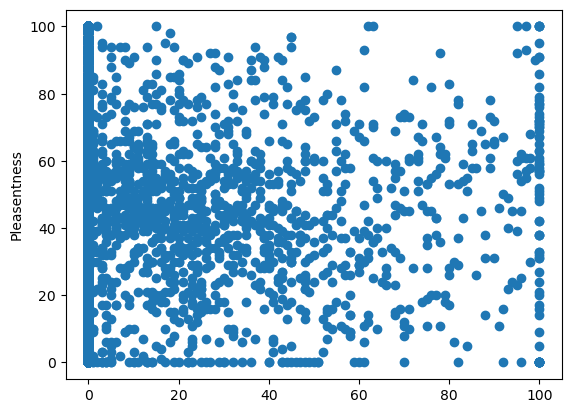

In [24]:
#Plot the Compounds against Pleasantness (high dilution dataset):

#Pleasantness against Pleasantness is included as control (should be a straight line)

column=list(df_numerical_high)


for i in range (1,20):
    print(column[i])
    data=df_numerical_high[column[i]]
    plt.scatter(data, df_numerical_high["VALENCE/PLEASANTNESS"])
    plt.ylabel("Pleasentness")

    plt.show()
    

From a first glance sweet looks most correlated. For a better analysis exclude the 0 values within adescriptor (gives bias since this descriptor was not smelled, but considered as negative correlation in an analysis)

## Datacleanup step 2: Remove Zero values for specific descriptors, when looking at correlation of this descriptor with Pleasantness

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13395 entries, 0 to 34984
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ACID                  13395 non-null  float64
 1   AMMONIA/URINOUS       13395 non-null  float64
 2   BAKERY                13395 non-null  float64
 3   BURNT                 13395 non-null  float64
 4   CHEMICAL              13395 non-null  float64
 5   COLD                  13395 non-null  float64
 6   DECAYED               13395 non-null  float64
 7   FISH                  13395 non-null  float64
 8   FLOWER                13395 non-null  float64
 9   FRUIT                 13395 non-null  float64
 10  GARLIC                13395 non-null  float64
 11  GRASS                 13395 non-null  float64
 12  MUSKY                 13395 non-null  float64
 13  SOUR                  13395 non-null  float64
 14  SPICES                13395 non-null  float64
 15  SWEATY             

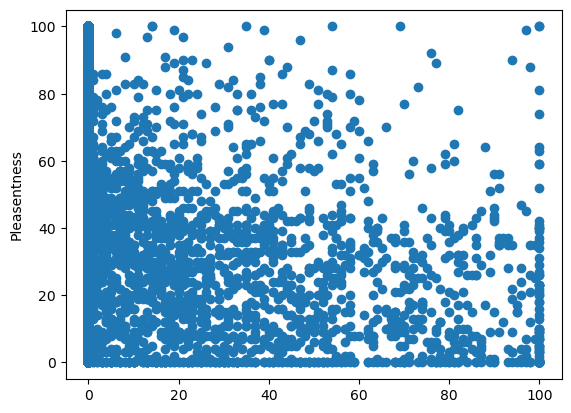

BAKERY


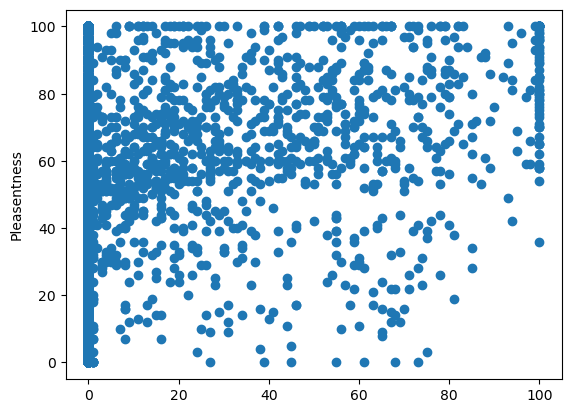

BURNT


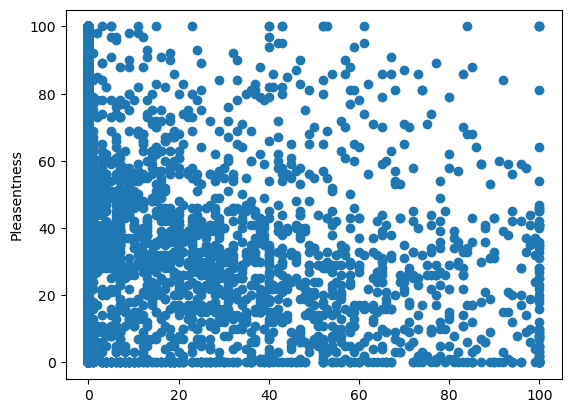

CHEMICAL


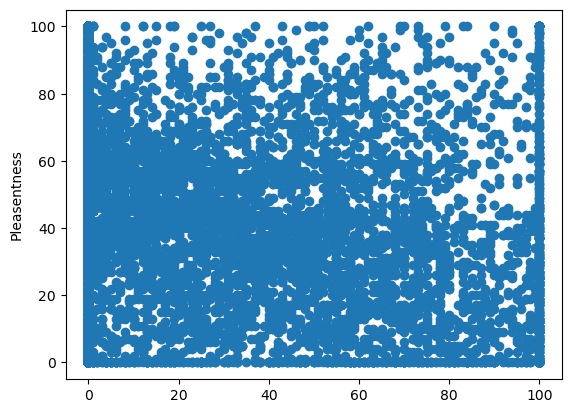

COLD


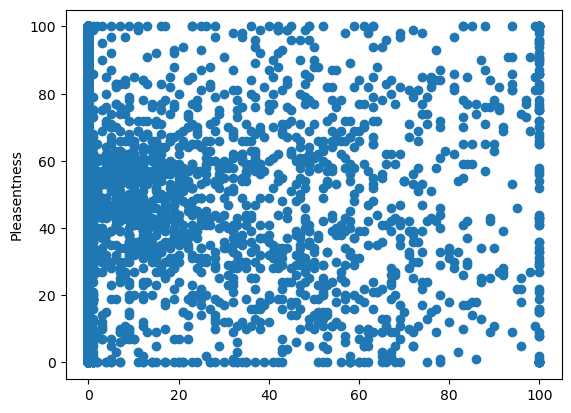

DECAYED


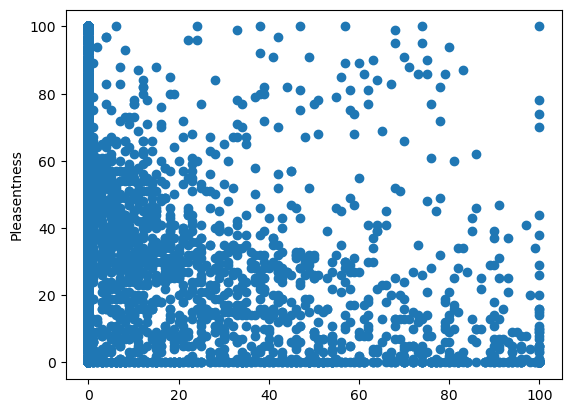

FISH


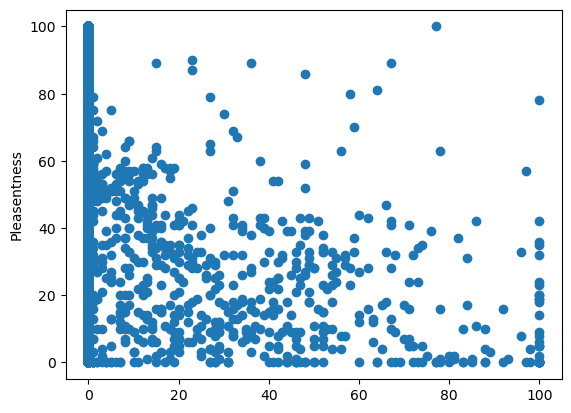

FLOWER


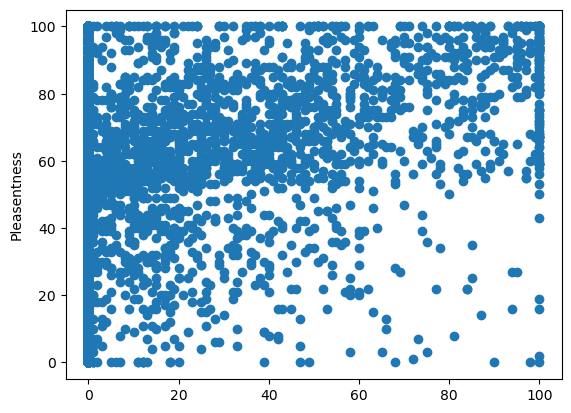

FRUIT


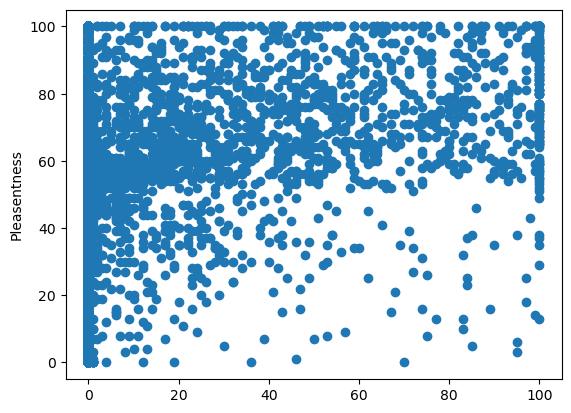

GARLIC


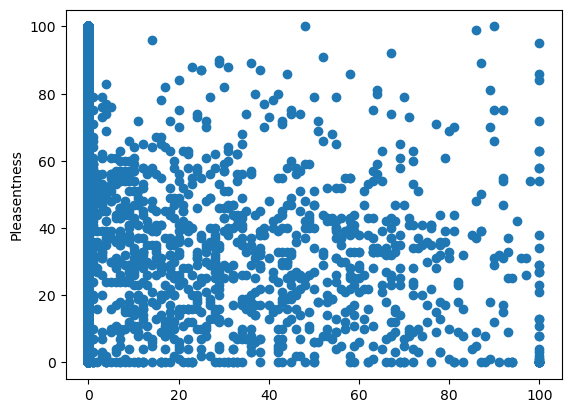

GRASS


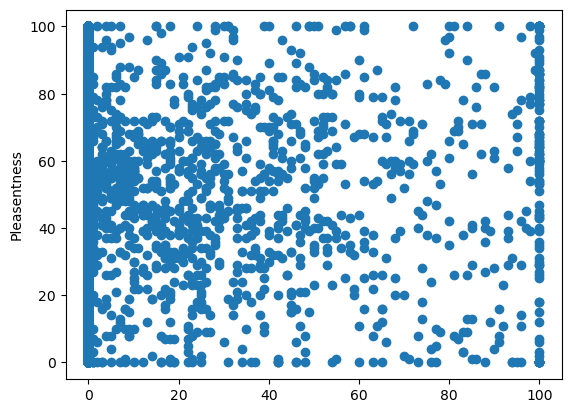

MUSKY


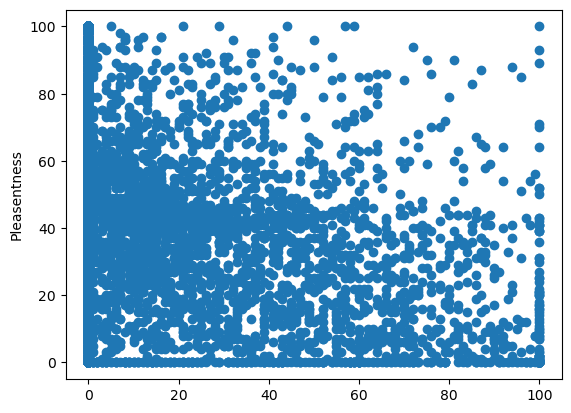

SOUR


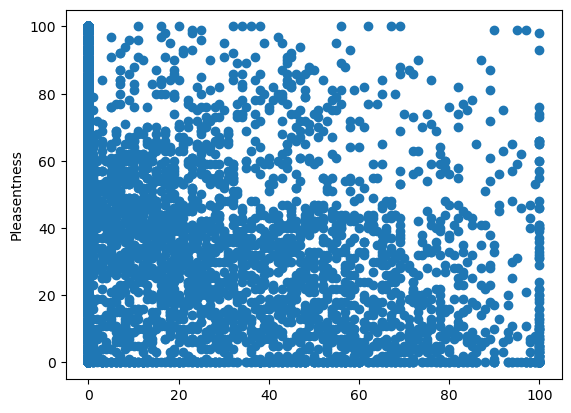

SPICES


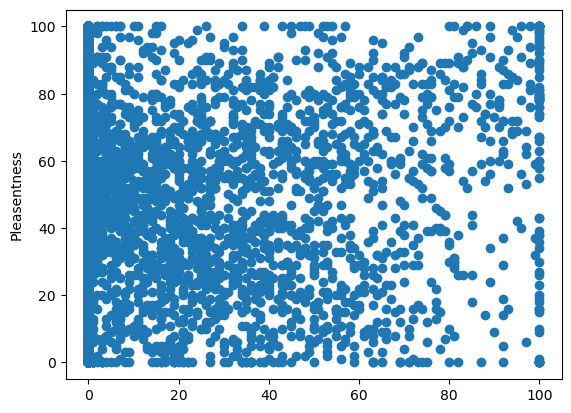

SWEATY


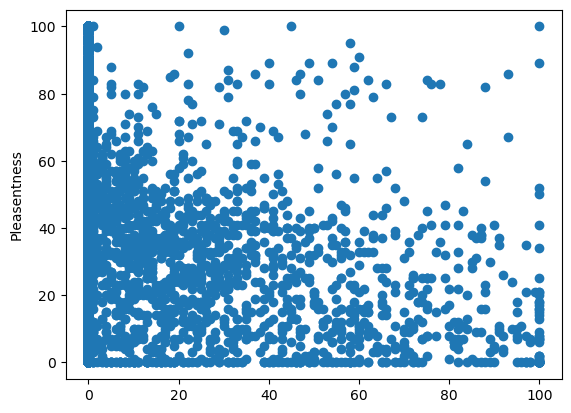

SWEET


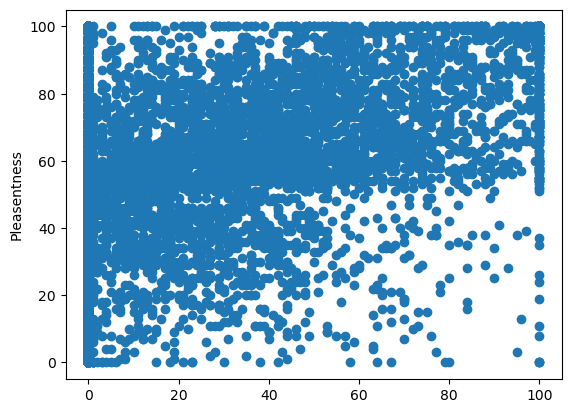

VALENCE/PLEASANTNESS


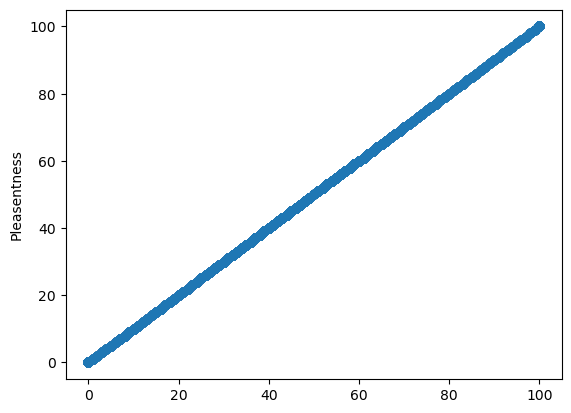

WARM


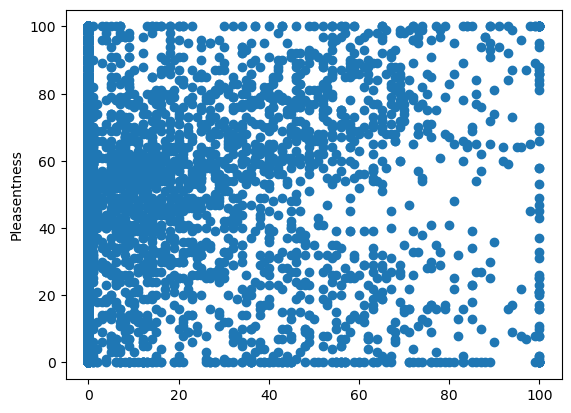

WOOD


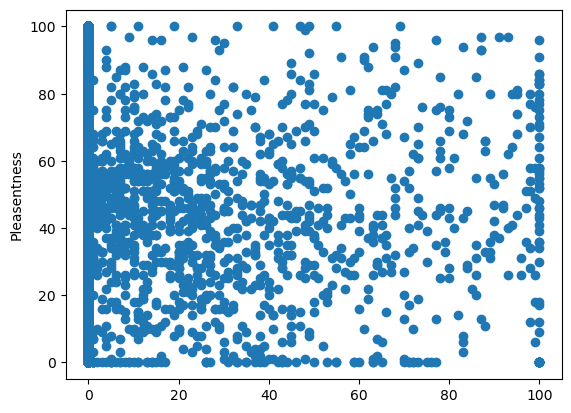

In [25]:
#Redo compound analysis for the low dilutions by plotting descriptor scores against pleasantness:

#Only include the numerical values for plotting
df_numerical_low=df_low.loc[:,(df_low.dtypes=='float64').values]
df_numerical_low.info()

column=list(df_numerical_low)


for i in range (1,20):
    print(column[i])
    data=df_numerical_low[column[i]]
    plt.scatter(data, df_numerical_low["VALENCE/PLEASANTNESS"])
    plt.ylabel("Pleasentness")

    plt.show()
    

From a first glance Sweet, fruit and Flower look positive correlated to pleasantness and SOUR, MUSKY and DECAYED seem negatively correlated. But the Zero values within the descriptors seem to shift the correlation. When looking at a specific descriptor, Zero values for this desriptor sould be excluded as in this case this specific descriptor does not influence the pleasantness as it is not senses at all (would lead to false conclusions if zero would be rated as low concentrated). 

2.234829002019331e-211


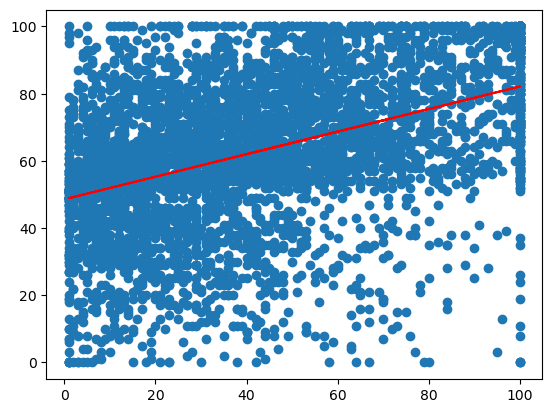

In [26]:
#Pretest: Exclude the Zero values in the Sweet descriptor and make a linear Regression: 

df_sweet = df_numerical_low.filter(["VALENCE/PLEASANTNESS","SWEET"],axis=1)
df_sweet_n= df_sweet[df_sweet["SWEET"] != 0.0]
df_sweet_n.dropna()
df_sweet_n
s, inter, r_value, p_value, std_err = stats.linregress(df_sweet_n["SWEET"], df_sweet_n["VALENCE/PLEASANTNESS"])
line = s * df_sweet_n["SWEET"] + inter
plt.scatter(df_sweet_n["SWEET"], df_sweet_n["VALENCE/PLEASANTNESS"])
plt.plot(df_sweet_n["SWEET"], line, color="red")
print(p_value)

In [29]:
column=list(df_numerical_low.drop("VALENCE/PLEASANTNESS", axis=1))

#for i in range (1,19):
    #print(column[i])

AMMONIA/URINOUS
The p-value for this Regression is: 2.431608458423712e-33 




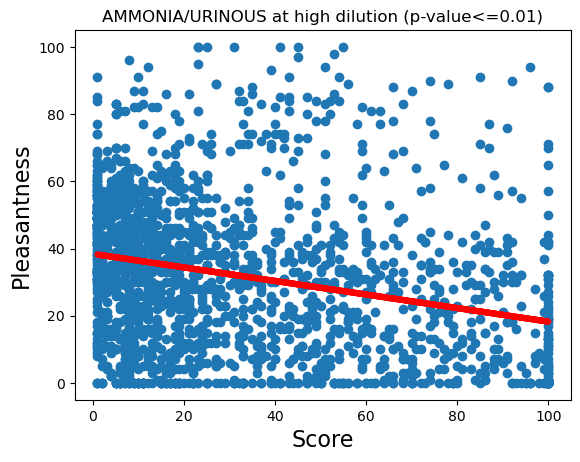

BAKERY
The p-value for this Regression is: 1.1011872821551425e-25 




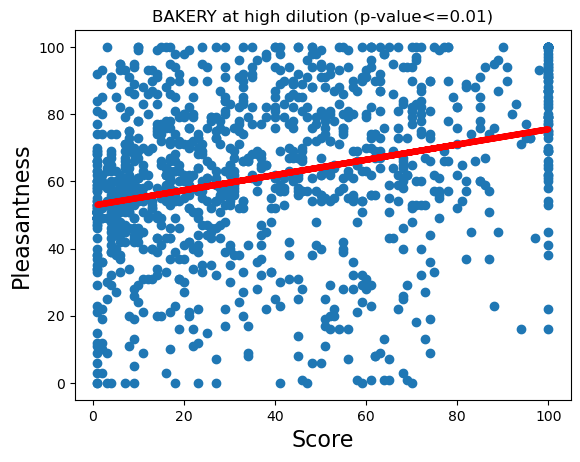

BURNT
The p-value for this Regression is: 2.777077551692262e-26 




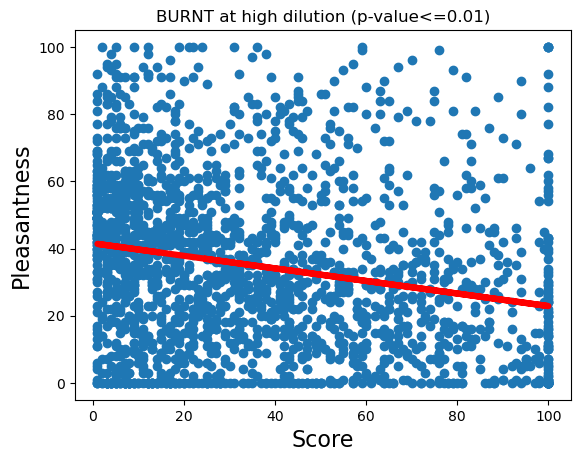

CHEMICAL
The p-value for this Regression is: 3.897411718772291e-30 




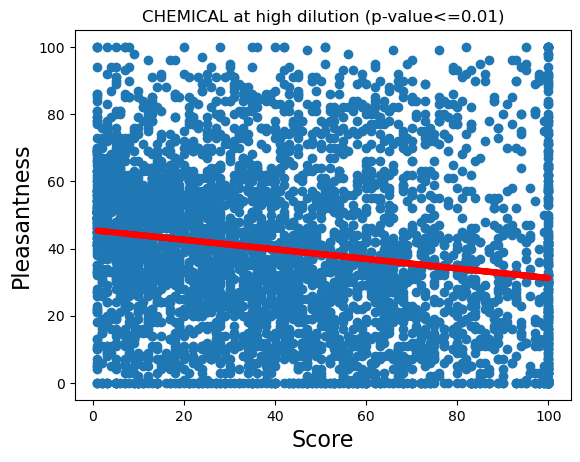

COLD
The p-value for this Regression is: 1.1261770876351478e-06 




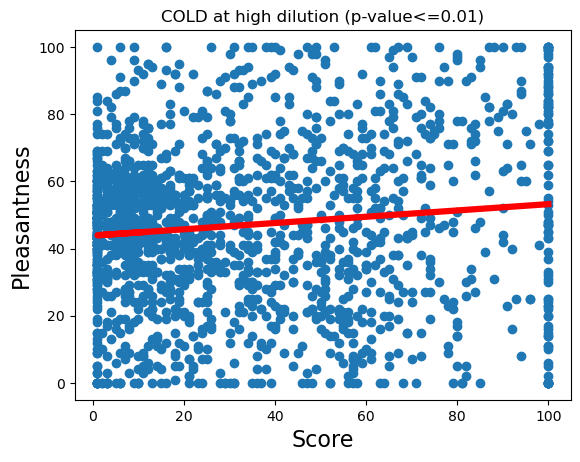

DECAYED
The p-value for this Regression is: 8.688393802720517e-47 




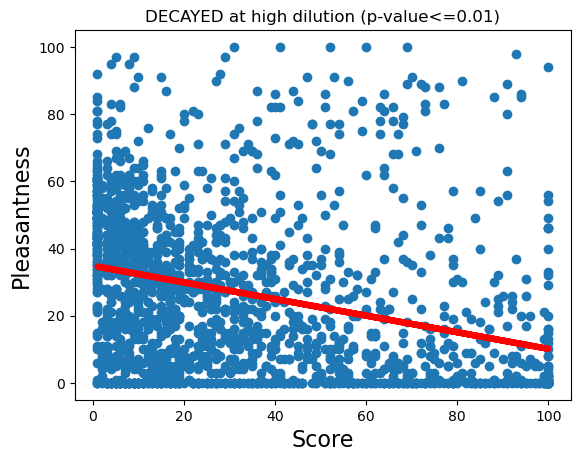

FISH
The p-value for this Regression is: 4.9830765924098225e-30 




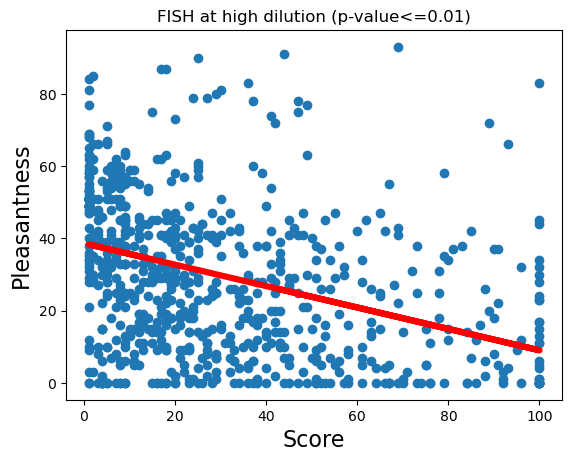

FLOWER
The p-value for this Regression is: 7.296451757790941e-94 




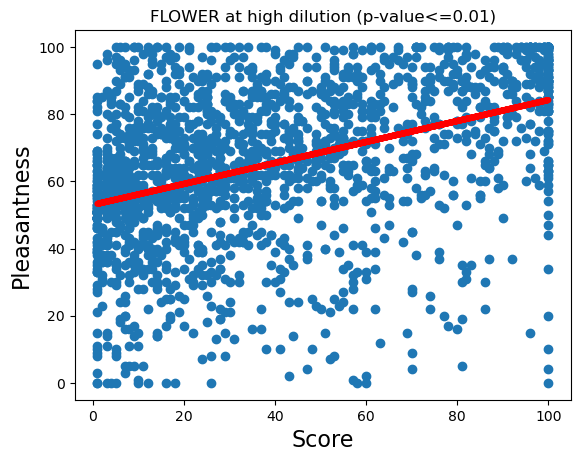

FRUIT
The p-value for this Regression is: 3.0288619553834196e-41 




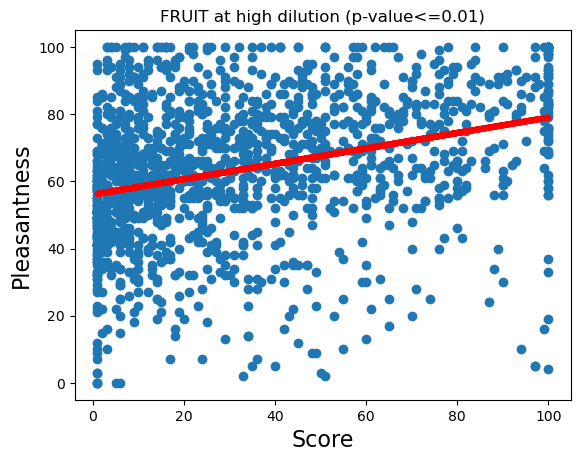

GARLIC
The p-value for this Regression is: 2.9019873639181854e-13 




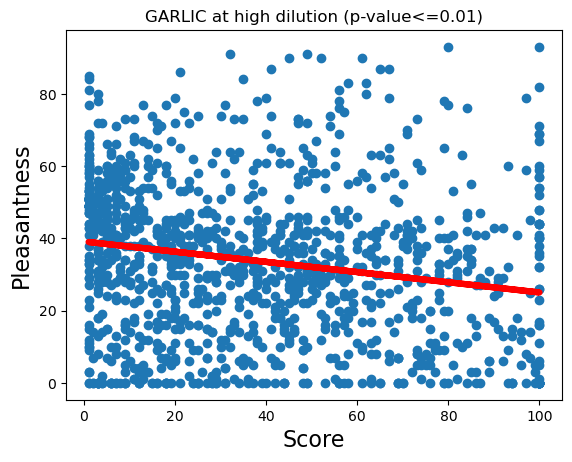

GRASS
The p-value for this Regression is: 0.009012354494434395 




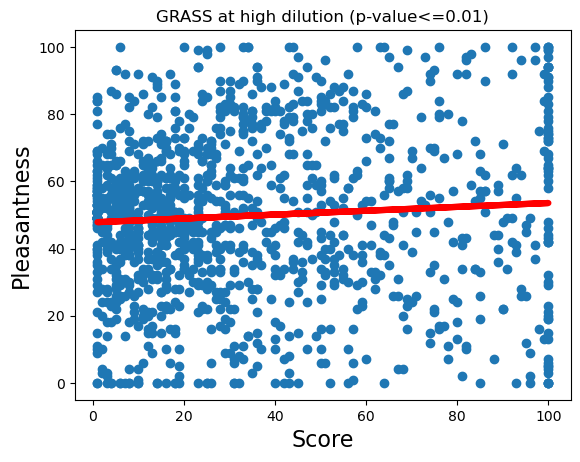

MUSKY
The p-value for this Regression is: 1.5394766118864587e-89 




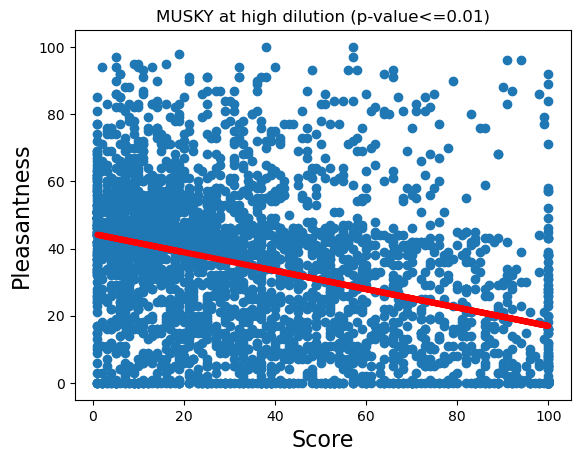

SOUR
The p-value for this Regression is: 5.444565092420505e-61 




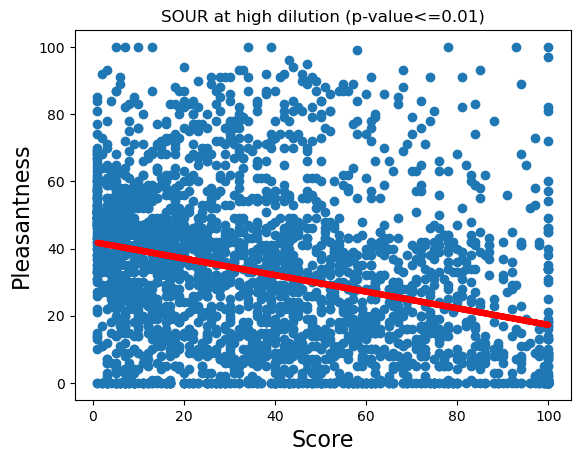

SPICES
The p-value for this Regression is: 0.08335829917354622 




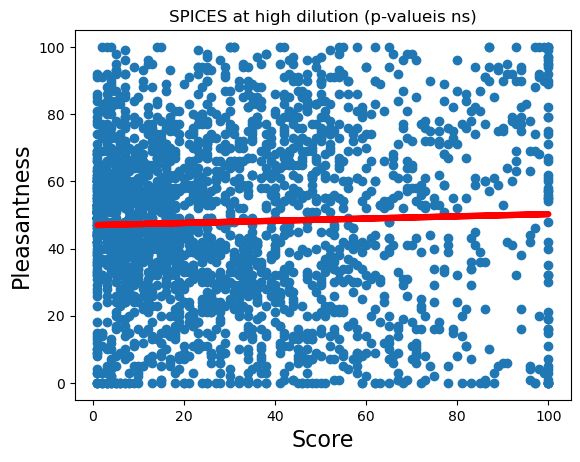

SWEATY
The p-value for this Regression is: 2.547231544671968e-44 




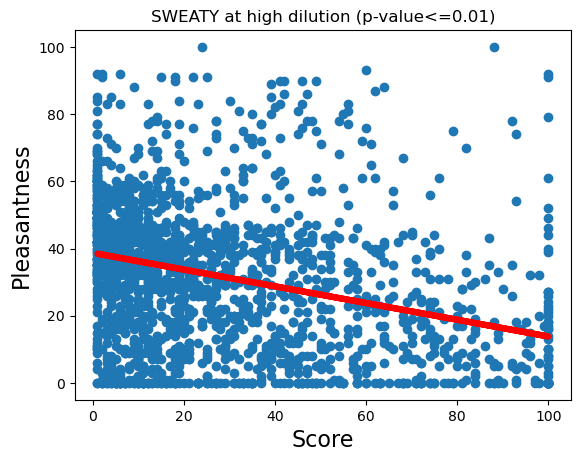

SWEET
The p-value for this Regression is: 2.331404330272508e-157 




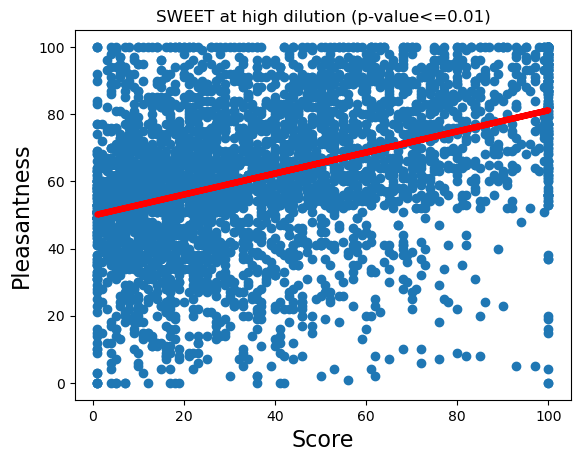

WARM
The p-value for this Regression is: 0.018486082717549316 




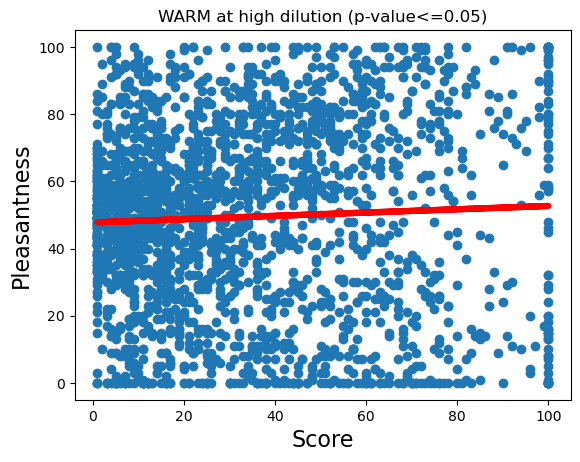

WOOD
The p-value for this Regression is: 0.6980270874575052 




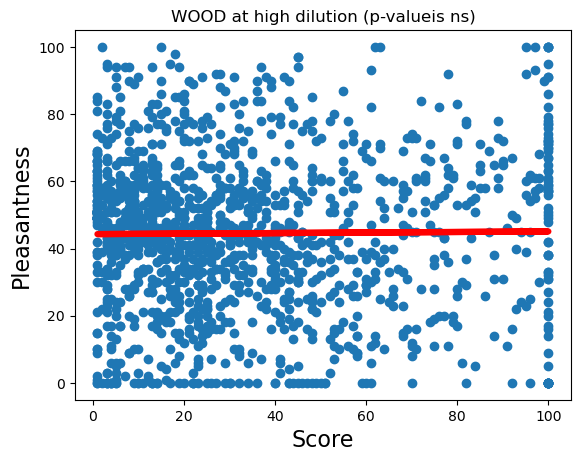

In [33]:
#DESCRIPTOR/PLEASANTNESS linear regression in high dilution dataset: 
#Exclude the Zero values in the specific descriptor if existing and only plot for Pleasantness (if descriptor is >0)

column=list(df_numerical_high.drop("VALENCE/PLEASANTNESS", axis=1))
name=0

for i in range (1,19):
    print(column[i])
    df_sweet = df_numerical_high.filter(["VALENCE/PLEASANTNESS",column[i]],axis=1)
    df_sweet_n= df_sweet[df_sweet[column[i]] != 0.0]
    df_sweet_n.dropna()
    df_sweet_n
    s, inter, r_value, p_value, std_err = stats.linregress(df_sweet_n[column[i]], df_sweet_n["VALENCE/PLEASANTNESS"])
    line = s * df_sweet_n[column[i]] + inter
    if p_value >0.05:
        sig = str("is ns")
    if p_value <=0.05 and p_value > 0.01:
        sig = str("<=0.05")
    if p_value <=0.01 :
        sig = str("<=0.01")
    plt.figure()
    plt.scatter(df_sweet_n[column[i]], df_sweet_n["VALENCE/PLEASANTNESS"])
    plt.plot(df_sweet_n[column[i]], line, color="red", linewidth=4.5)
    plt.title(column[i] + " at high dilution (p-value" + str(sig) + ")")
    
    plt.xlabel("Score", fontsize=16)
    
    plt.ylabel("Pleasantness", fontsize=16)
    
    print("The p-value for this Regression is:",p_value,"\n\n")
    name+=1
    plt.savefig(fname="High dilution of" + str(name) + ".png")
    plt.show()




AMMONIA/URINOUS
The p-value for this Regression is: 1.1441319646711755e-42 




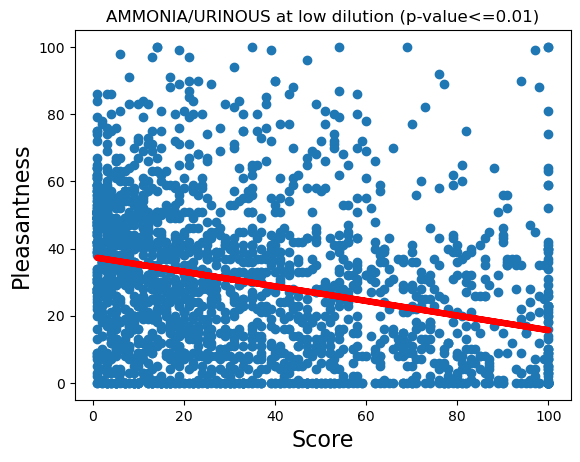

BAKERY
The p-value for this Regression is: 9.967447598405884e-39 




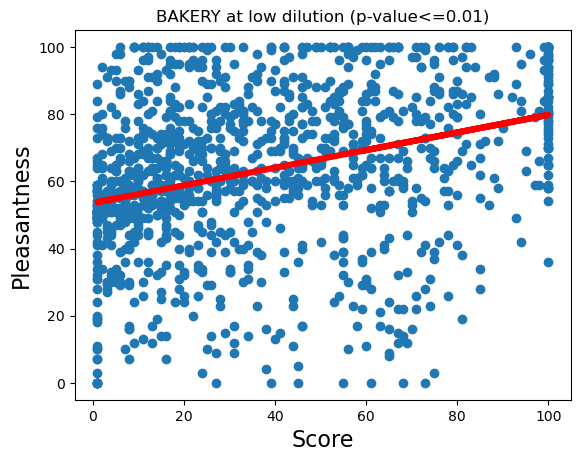

BURNT
The p-value for this Regression is: 2.5401876865249068e-26 




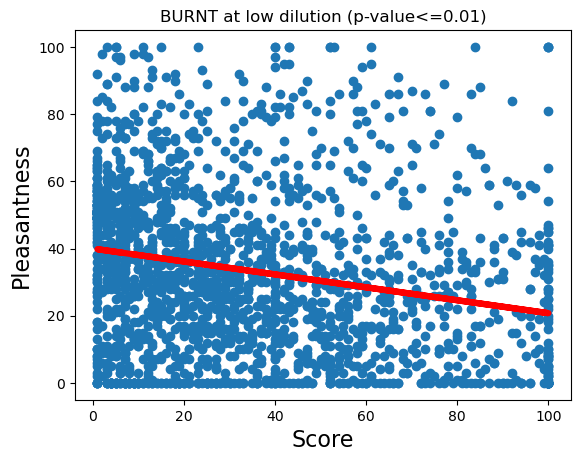

CHEMICAL
The p-value for this Regression is: 7.487421512977328e-41 




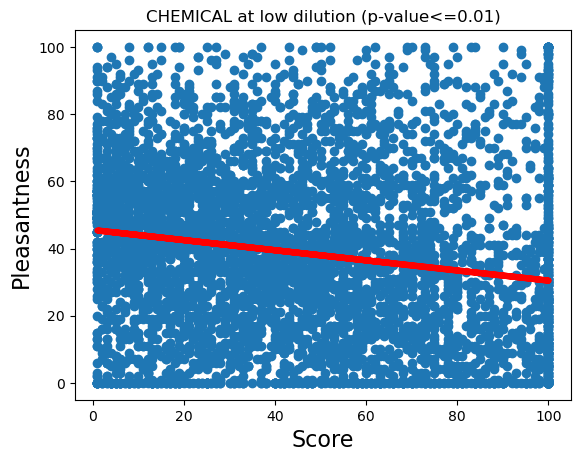

COLD
The p-value for this Regression is: 0.015981094784777317 




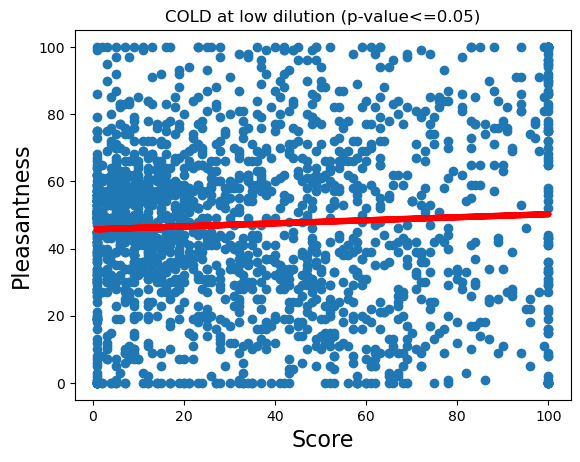

DECAYED
The p-value for this Regression is: 5.658071969672353e-71 




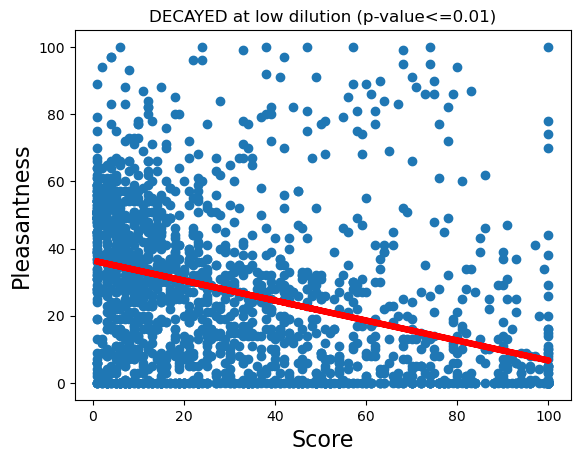

FISH
The p-value for this Regression is: 1.7051022160305433e-40 




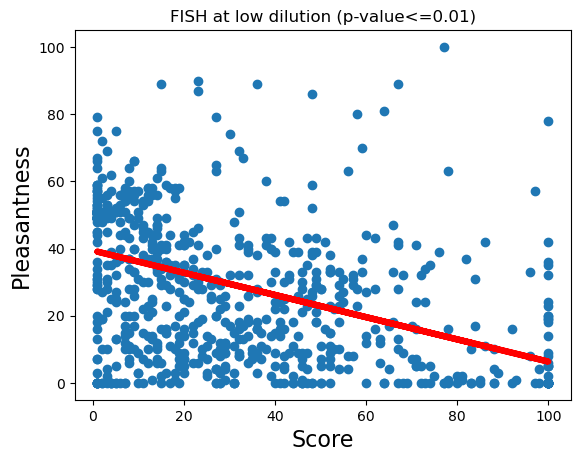

FLOWER
The p-value for this Regression is: 1.7239732776436218e-97 




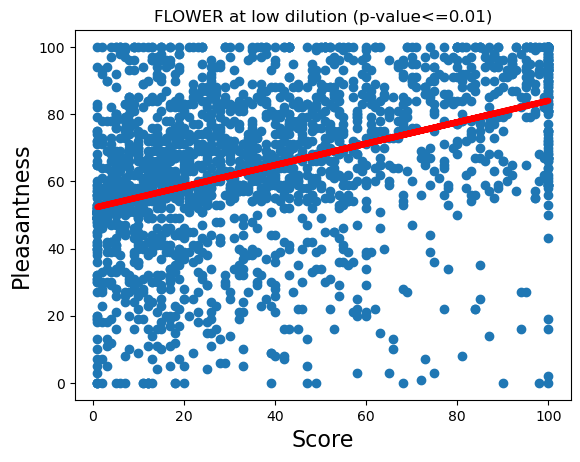

FRUIT
The p-value for this Regression is: 2.056582590537704e-81 




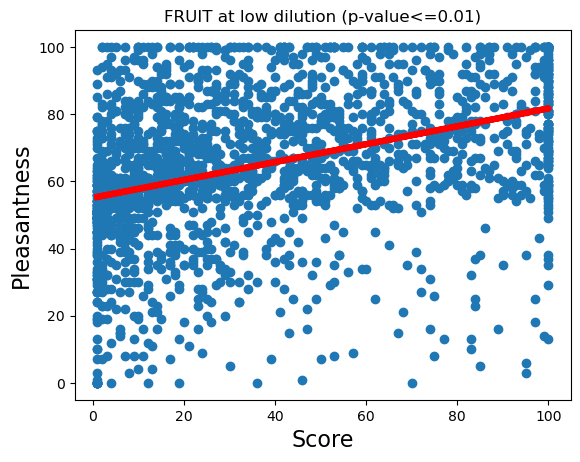

GARLIC
The p-value for this Regression is: 1.6154823868058858e-13 




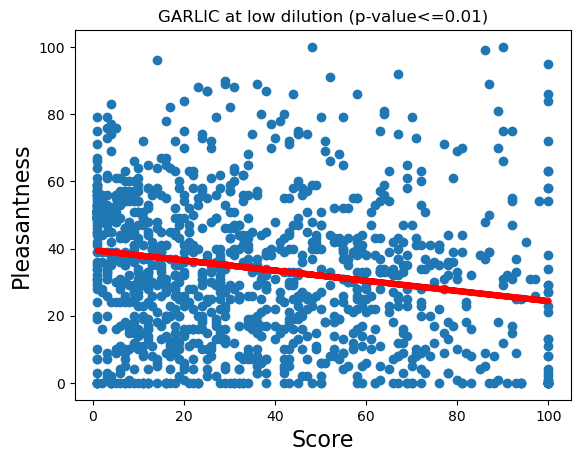

GRASS
The p-value for this Regression is: 0.11478091981525602 




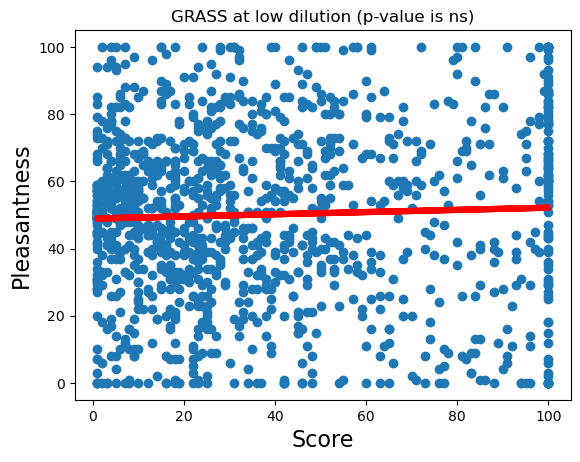

MUSKY
The p-value for this Regression is: 4.265274498112097e-99 




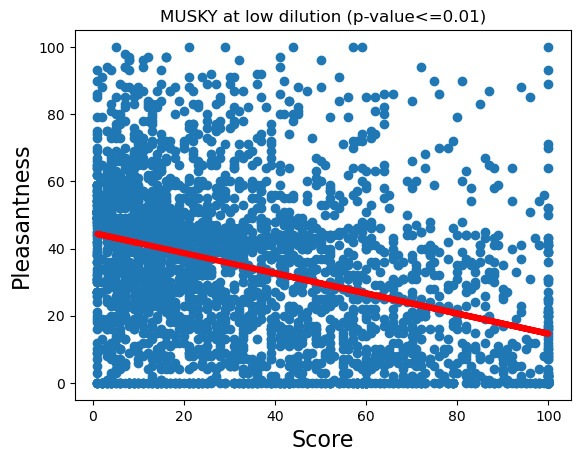

SOUR
The p-value for this Regression is: 3.9207678445503225e-60 




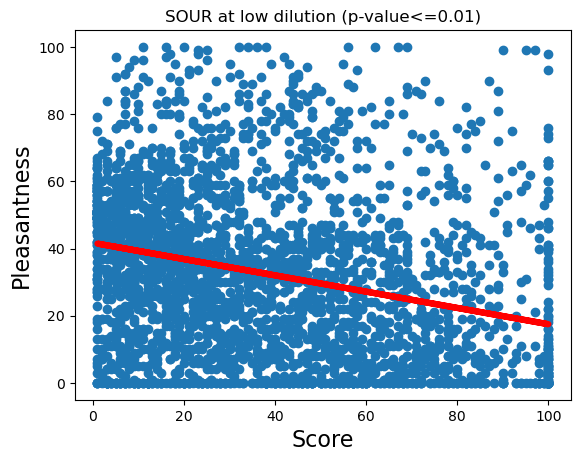

SPICES
The p-value for this Regression is: 1.1397623503539294e-09 




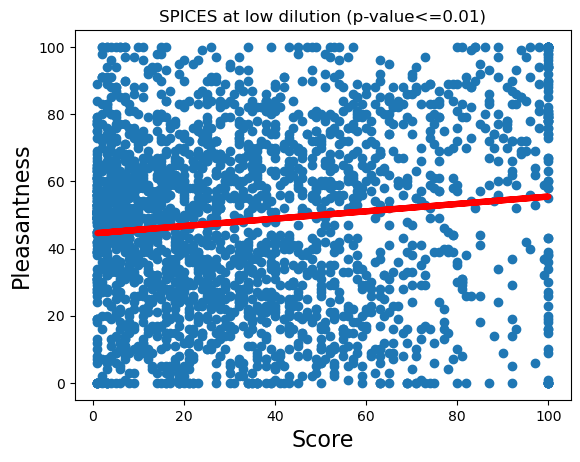

SWEATY
The p-value for this Regression is: 1.8933723283054022e-53 




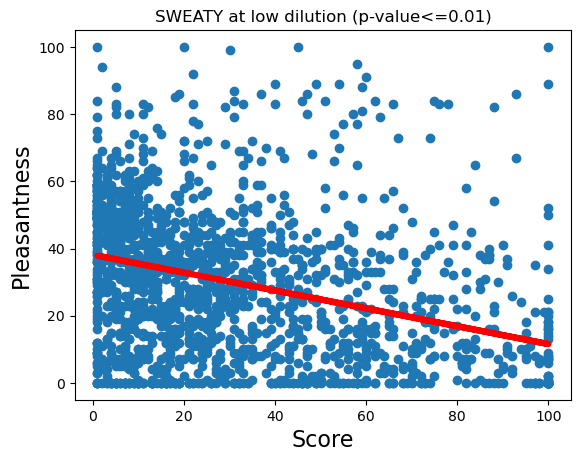

SWEET
The p-value for this Regression is: 2.234829002019331e-211 




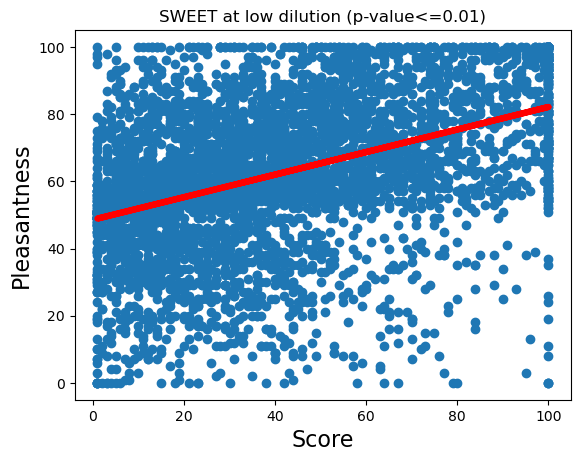

WARM
The p-value for this Regression is: 0.00024647581605366335 




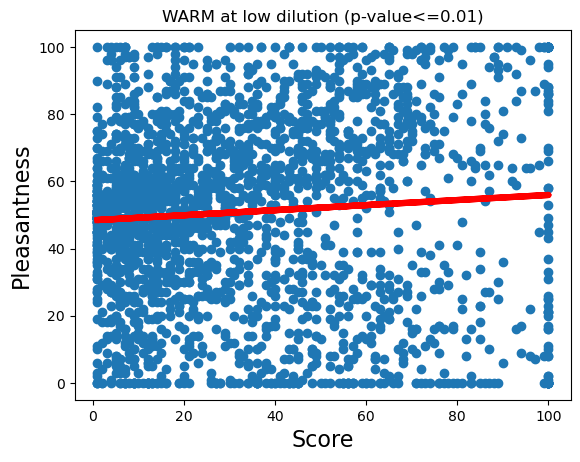

WOOD
The p-value for this Regression is: 0.9854015696592626 




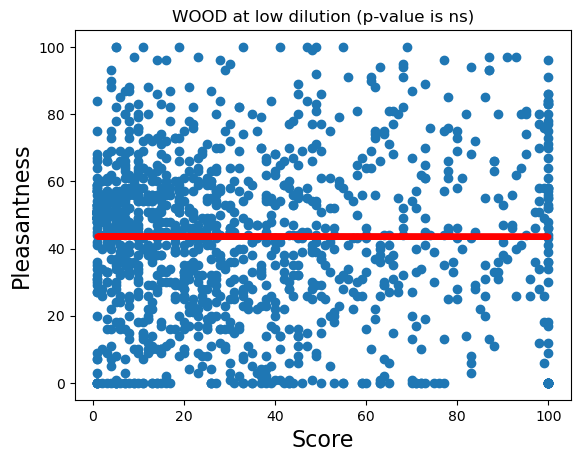

In [34]:
#DESCRIPTOR/PLEASANTNESS linear regression in low dilution dataset: 
#Exclude the Zero values for descriptors if existing and only plot for Pleasantness if there is a value >0

column=list(df_numerical_low.drop("VALENCE/PLEASANTNESS", axis=1))


for i in range (1,19):
    print(column[i])
    df_sweet = df_numerical_low.filter(["VALENCE/PLEASANTNESS",column[i]],axis=1)
    df_sweet_n= df_sweet[df_sweet[column[i]] != 0.0]
    df_sweet_n.dropna()
    df_sweet_n
    s, inter, r_value, p_value, std_err = stats.linregress(df_sweet_n[column[i]], df_sweet_n["VALENCE/PLEASANTNESS"])
    line = s * df_sweet_n[column[i]] + inter
    if p_value >0.05:
        sig = str(" is ns")
    if p_value <=0.05 and p_value > 0.01:
        sig = str("<=0.05")
    if p_value <=0.01 :
        sig = str("<=0.01")
    plt.figure()
    plt.scatter(df_sweet_n[column[i]], df_sweet_n["VALENCE/PLEASANTNESS"])
    plt.plot(df_sweet_n[column[i]], line, color="red", linewidth=4.5)
    plt.title(column[i] + " at low dilution (p-value" + str(sig) + ")")
    
    plt.xlabel("Score", fontsize=16)
    
    plt.ylabel("Pleasantness", fontsize=16)
    
    print("The p-value for this Regression is:",p_value,"\n\n")
    name+=1
    plt.savefig(fname="Low dilution of" + str(name) + ".png")
    plt.show()



PLEASANT:The Descriptors Bakery, Flower, Fruit and Sweet seem to be positively associated with PLeasantness in both high and low dilution

UNPLEASANT:The Descriptors Sweaty, Sour, Musky, Fish, Decayed, Burnt and Ammonia seem to be clearly negative correlated with Pleasantness

Slighly positive correalated:In the high dilution Spices have almost no slope. Interestingly in the low dilution Spices seem to be slightly positive correlated with Pleasantness

Slightly negative correlated:Garlic and Chemical seem to be slightly negative correlated with Pleasantness in both dilutions

# Combined Plot of Correlations

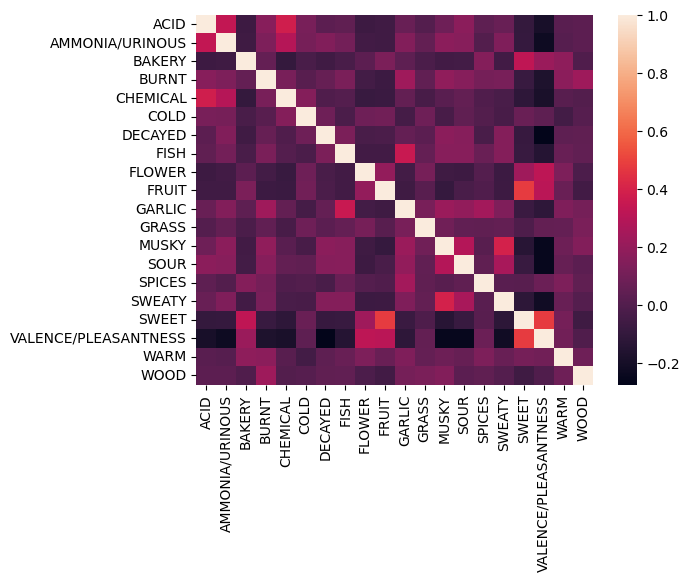

In [35]:
#The Correlation plot with the data containing the Zero values in the single descriptors (low dilutions): 

correlation_mat = df_numerical_low.corr()
sns.heatmap(correlation_mat)
plt.show()

This plot shows, that we get the highest correlation for Sweet, but the correlations are lower than with a dataset that excludes the Zero values for the respective Descriptors (as done in the plots above). It is better to calculate the correlation with excluding the Zero values for the respective Descriptors and combine the calculations afterwards in a combined plot (explenation desribed above).

In [46]:
# Calculate the Correlation coefficient seperately with Pearson for the different descriptors (high dilution)

from scipy import stats
#stats.pearsonr(['Strength'], con['FlyAsh'])

df_sweet = df_numerical_low.filter(["VALENCE/PLEASANTNESS","SWEET"],axis=1)
df_sweet_n= df_sweet[df_sweet["SWEET"] != 0.0]
df_sweet_n.dropna()
df_sweet_n
stats=stats.pearsonr(df_sweet_n['VALENCE/PLEASANTNESS'], df_sweet_n['SWEET'])


Step 1: Calculation of the Pearson Correlation coefficient for the different descriptors (with excluded Zero values):

In [47]:
from scipy import stats
Dataset_person_low={"descriptor": [], "pearson_slope": [], "pearson_p":[]}

for i in range (1,19):
    df_sweet = df_numerical_low.filter(["VALENCE/PLEASANTNESS",column[i]],axis=1)
    df_sweet_n= df_sweet[df_sweet[column[i]] != 0.0]
    df_sweet_n.dropna()
    df_sweet_n
    Pearson_coefficients=stats.pearsonr(df_sweet_n['VALENCE/PLEASANTNESS'], df_sweet_n[column[i]])
    Dataset_person_low["descriptor"].append(column[i])
    Dataset_person_low["pearson_slope"].append( Pearson_coefficients[0])
    Dataset_person_low["pearson_p"].append(Pearson_coefficients[1])
    #print(Pearson_coefficients[0])

df_Pearson_low=pd.DataFrame(Dataset_person_low)


In [48]:
df_Pearson_low.sort_values(by="pearson_slope", inplace=True) #Inplace makes, that it stays in this order
df_Pearson_low["Intensity"] = "low"

In [49]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

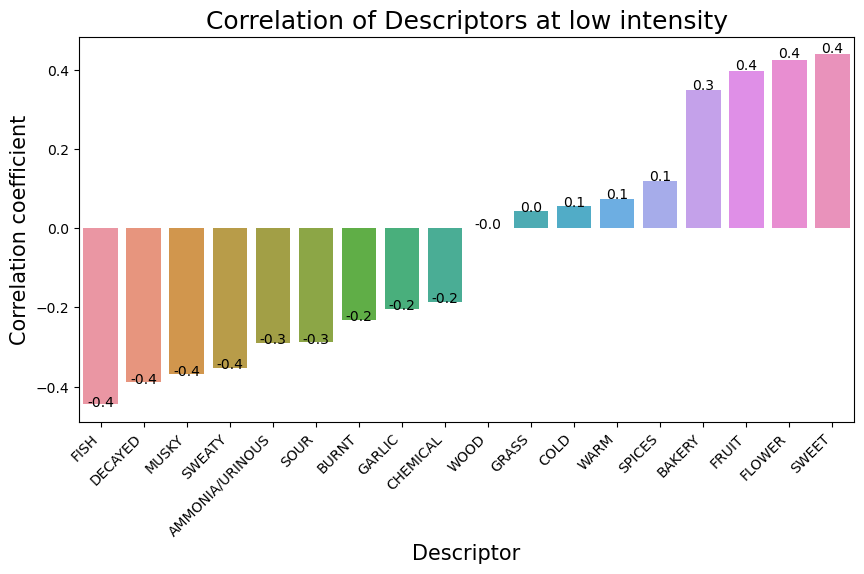

<Figure size 640x480 with 0 Axes>

In [50]:
fig = plt.figure(figsize=(10, 5))
ax=sns.barplot(x=df_Pearson_low["descriptor"], y=df_Pearson_low["pearson_slope"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_xlabel('Descriptor', fontsize=15)
ax.set_ylabel('Correlation coefficient', fontsize=15)
ax.set_title("Correlation of Descriptors at low intensity", fontsize=18)
show_values(ax)
plt.show()
plt.savefig('Slopes of Low Intensity descriptor')

In [51]:
Dataset_person_high={"descriptor": [], "pearson_slope": [], "pearson_p":[]}

for i in range (1,19):
    df_sweet = df_numerical_high.filter(["VALENCE/PLEASANTNESS",column[i]],axis=1)
    df_sweet_n= df_sweet[df_sweet[column[i]] != 0.0]
    df_sweet_n.dropna()
    df_sweet_n
    Pearson_coefficients=stats.pearsonr(df_sweet_n['VALENCE/PLEASANTNESS'], df_sweet_n[column[i]])
    Dataset_person_high["descriptor"].append(column[i])
    Dataset_person_high["pearson_slope"].append( Pearson_coefficients[0])
    Dataset_person_high["pearson_p"].append(Pearson_coefficients[1])
    #print(Pearson_coefficients[0])

df_Pearson_high=pd.DataFrame(Dataset_person_high)

In [52]:
df_Pearson_high.sort_values(by="pearson_slope", inplace=True)
df_Pearson_high["Intensity"] = "high"

In [53]:
df_Pearson_high

descriptor  pearson_slope      pearson_p Intensity
6              FISH      -0.389102   4.983077e-30      high
11            MUSKY      -0.346744   1.539477e-89      high
14           SWEATY      -0.323736   2.547232e-44      high
5           DECAYED      -0.322602   8.688394e-47      high
12             SOUR      -0.302612   5.444565e-61      high
0   AMMONIA/URINOUS      -0.271290   2.431608e-33      high
2             BURNT      -0.228787   2.777078e-26      high
9            GARLIC      -0.202021   2.901987e-13      high
3          CHEMICAL      -0.173380   3.897412e-30      high
17             WOOD       0.010233   6.980271e-01      high
13           SPICES       0.035264   8.335830e-02      high
16             WARM       0.048874   1.848608e-02      high
10            GRASS       0.072103   9.012354e-03      high
4              COLD       0.117064   1.126177e-06      high
1            BAKERY       0.294084   1.101187e-25      high
8             FRUIT       0.330176   3.028862e-41      high
15            SWEET       0.408356  2.331404e-157      high
7            FLOWER       0.440865   7.296452e-94      high

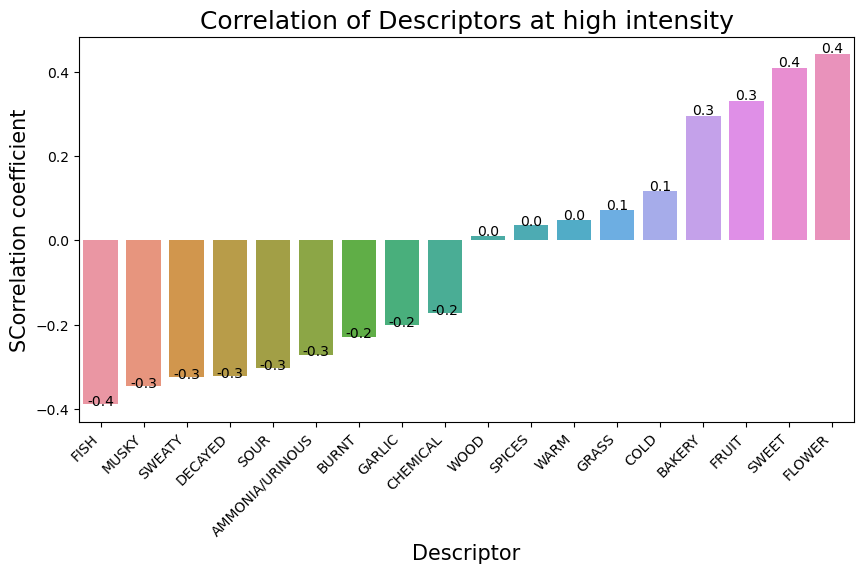

<Figure size 640x480 with 0 Axes>

In [54]:
fig = plt.figure(figsize=(10, 5))
ax=sns.barplot(x=df_Pearson_high["descriptor"], y=df_Pearson_high["pearson_slope"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_xlabel('Descriptor', fontsize=15)
ax.set_ylabel('SCorrelation coefficient', fontsize=15)
ax.set_title("Correlation of Descriptors at high intensity", fontsize=18)
show_values(ax)
plt.show()
plt.savefig('Slopes of High Intensity descriptor')

Step 2: Combine the Correlation values for low adn high intensities in one plot

In [55]:
df_combined = pd.concat([df_Pearson_high, df_Pearson_low])
df_combined

descriptor  pearson_slope      pearson_p Intensity
6              FISH      -0.389102   4.983077e-30      high
11            MUSKY      -0.346744   1.539477e-89      high
14           SWEATY      -0.323736   2.547232e-44      high
5           DECAYED      -0.322602   8.688394e-47      high
12             SOUR      -0.302612   5.444565e-61      high
0   AMMONIA/URINOUS      -0.271290   2.431608e-33      high
2             BURNT      -0.228787   2.777078e-26      high
9            GARLIC      -0.202021   2.901987e-13      high
3          CHEMICAL      -0.173380   3.897412e-30      high
17             WOOD       0.010233   6.980271e-01      high
13           SPICES       0.035264   8.335830e-02      high
16             WARM       0.048874   1.848608e-02      high
10            GRASS       0.072103   9.012354e-03      high
4              COLD       0.117064   1.126177e-06      high
1            BAKERY       0.294084   1.101187e-25      high
8             FRUIT       0.330176   3.028862e-41      high
15            SWEET       0.408356  2.331404e-157      high
7            FLOWER       0.440865   7.296452e-94      high
6              FISH      -0.444709   1.705102e-40       low
5           DECAYED      -0.387096   5.658072e-71       low
11            MUSKY      -0.368926   4.265274e-99       low
14           SWEATY      -0.351832   1.893372e-53       low
0   AMMONIA/URINOUS      -0.289373   1.144132e-42       low
12             SOUR      -0.287743   3.920768e-60       low
2             BURNT      -0.231177   2.540188e-26       low
9            GARLIC      -0.203214   1.615482e-13       low
3          CHEMICAL      -0.185026   7.487422e-41       low
17             WOOD      -0.000495   9.854016e-01       low
10            GRASS       0.042550   1.147809e-01       low
4              COLD       0.055037   1.598109e-02       low
16             WARM       0.075172   2.464758e-04       low
13           SPICES       0.120427   1.139762e-09       low
1            BAKERY       0.348227   9.967448e-39       low
8             FRUIT       0.396907   2.056583e-81       low
7            FLOWER       0.425832   1.723973e-97       low
15            SWEET       0.439287  2.234829e-211       low

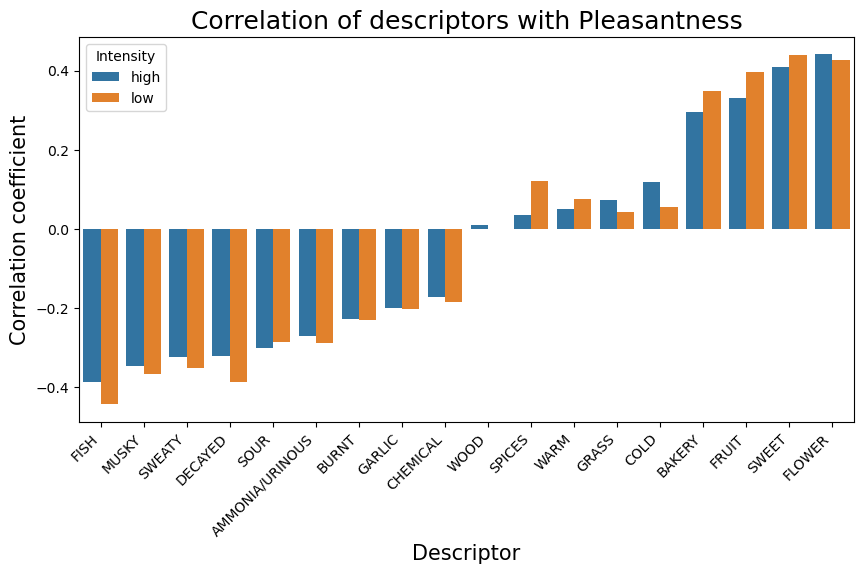

<Figure size 640x480 with 0 Axes>

In [56]:
#Plotting the Positive and negative Correlations of low and high dilutions

fig = plt.figure(figsize=(10, 5))
ax=sns.barplot(x=df_combined["descriptor"], y=df_combined["pearson_slope"], hue=df_combined["Intensity"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_xlabel('Descriptor', fontsize=15)
ax.set_ylabel('Correlation coefficient', fontsize=15)
ax.set_title("Correlation of descriptors with Pleasantness", fontsize=18)
plt.show()
plt.savefig('Slopes of High and Low Intensity descriptor 2')

**Test for multiple Testing error**

In [57]:
from statsmodels.stats.multitest import multipletests

In [60]:
fdr = multipletests(df_combined["pearson_p"], is_sorted=False, method="fdr_bh", alpha=0.05)
df_combined["reject"] = fdr[0]
df_combined["pval_cor"] = fdr[1]
#df_combined = pd.DataFrame(df_combined).set_index("Compound Identifier")
df_combined

descriptor  pearson_slope      pearson_p Intensity  reject  \
6              FISH      -0.389102   4.983077e-30      high    True   
11            MUSKY      -0.346744   1.539477e-89      high    True   
14           SWEATY      -0.323736   2.547232e-44      high    True   
5           DECAYED      -0.322602   8.688394e-47      high    True   
12             SOUR      -0.302612   5.444565e-61      high    True   
0   AMMONIA/URINOUS      -0.271290   2.431608e-33      high    True   
2             BURNT      -0.228787   2.777078e-26      high    True   
9            GARLIC      -0.202021   2.901987e-13      high    True   
3          CHEMICAL      -0.173380   3.897412e-30      high    True   
17             WOOD       0.010233   6.980271e-01      high   False   
13           SPICES       0.035264   8.335830e-02      high   False   
16             WARM       0.048874   1.848608e-02      high    True   
10            GRASS       0.072103   9.012354e-03      high    True   
4              COLD       0.117064   1.126177e-06      high    True   
1            BAKERY       0.294084   1.101187e-25      high    True   
8             FRUIT       0.330176   3.028862e-41      high    True   
15            SWEET       0.408356  2.331404e-157      high    True   
7            FLOWER       0.440865   7.296452e-94      high    True   
6              FISH      -0.444709   1.705102e-40       low    True   
5           DECAYED      -0.387096   5.658072e-71       low    True   
11            MUSKY      -0.368926   4.265274e-99       low    True   
14           SWEATY      -0.351832   1.893372e-53       low    True   
0   AMMONIA/URINOUS      -0.289373   1.144132e-42       low    True   
12             SOUR      -0.287743   3.920768e-60       low    True   
2             BURNT      -0.231177   2.540188e-26       low    True   
9            GARLIC      -0.203214   1.615482e-13       low    True   
3          CHEMICAL      -0.185026   7.487422e-41       low    True   
17             WOOD      -0.000495   9.854016e-01       low   False   
10            GRASS       0.042550   1.147809e-01       low   False   
4              COLD       0.055037   1.598109e-02       low    True   
16             WARM       0.075172   2.464758e-04       low    True   
13           SPICES       0.120427   1.139762e-09       low    True   
1            BAKERY       0.348227   9.967448e-39       low    True   
8             FRUIT       0.396907   2.056583e-81       low    True   
7            FLOWER       0.425832   1.723973e-97       low    True   
15            SWEET       0.439287  2.234829e-211       low    True   

         pval_cor  
6    8.542417e-30  
11   9.236860e-89  
14   7.053872e-44  
5    2.606518e-46  
12   2.177826e-60  
0    4.607258e-33  
2    4.346730e-26  
9    4.018136e-13  
3    7.015341e-30  
17   7.179707e-01  
13   9.093633e-02  
16   2.079684e-02  
10   1.081483e-02  
4    1.447942e-06  
1    1.651781e-25  
8    7.269269e-41  
15  4.196528e-156  
7    5.253445e-93  
6    3.610805e-40  
5    2.546132e-70  
11   5.118329e-98  
14   6.196491e-53  
0    2.942054e-42  
12   1.411476e-59  
2    4.156671e-26  
9    2.326295e-13  
3    1.684670e-40  
17   9.854016e-01  
10   1.215327e-01  
4    1.855869e-02  
16   3.059700e-04  
13   1.519683e-09  
1    1.993490e-38  
8    1.057671e-80  
7    1.551576e-96  
15  8.045384e-210

Generally the significance level stays for most descriptors after correction. Grass (low) gets less significant.

## Extension: Add p-value Category to the dataframe (not part of the analysis) 

In [202]:
df_high.head()

ACID  AMMONIA/URINOUS  BAKERY  BURNT  CHEMICAL  COLD  Compound Identifier  \
1    0.0              0.0     0.0    0.0       0.0   0.0                  126   
3    0.0              0.0     0.0    0.0       7.0   0.0                  126   
7    0.0              0.0     0.0    0.0       0.0   0.0                  126   
9    0.0              0.0     0.0    0.0       0.0   0.0                  126   
11   0.0             31.0     0.0    0.0       0.0   0.0                  126   

    DECAYED Dilution  FISH  ...                    Odor  Replicate  SOUR  \
1       0.0     1/10   0.0  ...  4-Hydroxybenzaldehyde         NaN   0.0   
3       0.0     1/10   0.0  ...  4-Hydroxybenzaldehyde         NaN   0.0   
7       0.0     1/10   0.0  ...  4-Hydroxybenzaldehyde         NaN   0.0   
9       0.0     1/10   0.0  ...  4-Hydroxybenzaldehyde         NaN   0.0   
11      0.0     1/10   0.0  ...  4-Hydroxybenzaldehyde         NaN  26.0   

    SPICES  SWEATY SWEET  VALENCE/PLEASANTNESS WARM WOOD  subject #  
1      0.0     0.0  72.0                  60.0  0.0  0.0          1  
3     11.0     0.0   9.0                  71.0  0.0  0.0          2  
7      0.0     0.0   0.0                  90.0  0.0  0.0          4  
9      0.0     0.0   0.0                  58.0  0.0  0.0          5  
11     0.0     0.0   0.0                  49.0  0.0  0.0          6  

[5 rows x 27 columns]

In [96]:
df_high["Category_Pleasant"]=0
df_low["Category_Pleasant"]=0

In [115]:
df_high.head()

ACID  AMMONIA/URINOUS  BAKERY  BURNT  CHEMICAL  COLD  Compound Identifier  \
1    0.0              0.0     0.0    0.0       0.0   0.0                  126   
3    0.0              0.0     0.0    0.0       7.0   0.0                  126   
7    0.0              0.0     0.0    0.0       0.0   0.0                  126   
9    0.0              0.0     0.0    0.0       0.0   0.0                  126   
11   0.0             31.0     0.0    0.0       0.0   0.0                  126   

    DECAYED Dilution  FISH  ...  SOUR  SPICES  SWEATY  SWEET  \
1       0.0     1/10   0.0  ...   0.0     0.0     0.0   72.0   
3       0.0     1/10   0.0  ...   0.0    11.0     0.0    9.0   
7       0.0     1/10   0.0  ...   0.0     0.0     0.0    0.0   
9       0.0     1/10   0.0  ...   0.0     0.0     0.0    0.0   
11      0.0     1/10   0.0  ...  26.0     0.0     0.0    0.0   

    VALENCE/PLEASANTNESS WARM  WOOD subject # new  Category_Pleasant  
1                   60.0  0.0   0.0         1   0                  0  
3                   71.0  0.0   0.0         2   0                  0  
7                   90.0  0.0   0.0         4   0                  0  
9                   58.0  0.0   0.0         5   0                  0  
11                  49.0  0.0   0.0         6   0                  0  

[5 rows x 29 columns]

In [218]:
rows=len(df_combined)
print(rows)

df_combined["p_stars"] = 0
df_combined.tail()
p=math.log10(df_combined["pearson_p"].iloc[0])
print(p)

for i in range (rows):
    p=math.log10(df_combined["pearson_p"].iloc[i])*(-1)
    if p <= 20: 
        p_s=1
    if p>20 and p<=40:
        p_s=2
    if p >40 and p<=70:
        p_s=3
    if p >70:
        p_s=4
    df_combined["p_stars"].iloc[i]=p_s

df_combined.tail()

    

36
-29.30250243745175


/Users/nagret/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


descriptor  pearson_slope      pearson_p Intensity  p_stars
13     SPICES       0.120427   1.139762e-09       low        1
1      BAKERY       0.348227   9.967448e-39       low        2
8       FRUIT       0.396907   2.056583e-81       low        4
7      FLOWER       0.425832   1.723973e-97       low        4
15      SWEET       0.439287  2.234829e-211       low        4

3


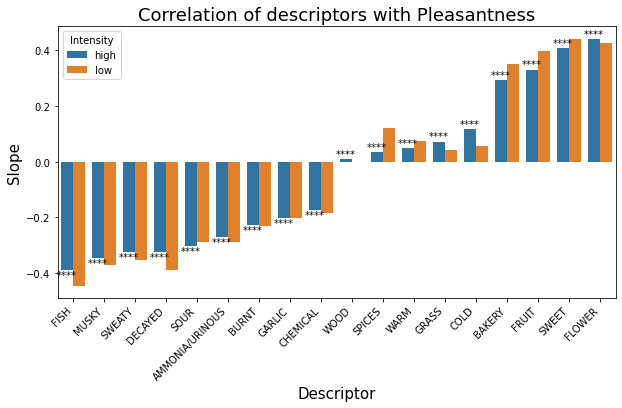

<Figure size 432x288 with 0 Axes>

In [294]:
#Plotting the Positive and negative Correlations of low and high dilutions
print(df_combined["p_stars"].iloc[2])

fig = plt.figure(figsize=(10, 5))
ax=sns.barplot(x=df_combined["descriptor"], y=df_combined["pearson_slope"], hue=df_combined["Intensity"])
for i in range(int(len(df_combined)/2)):
    star = "*"
    temp = star*df_combined["p_stars"].iloc[i]
    labels = temp,labels
ax.bar_label(ax.containers[0], fmt = star*df_combined["p_stars"].iloc[i])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_xlabel('Descriptor', fontsize=15)
ax.set_ylabel('Slope', fontsize=15)
ax.set_title("Correlation of descriptors with Pleasantness", fontsize=18)
plt.show()
plt.savefig('Slopes of High and Low Intensity descriptor')